
# Correlating Specific Pollution Sources with Air Quality Level

Steffany Lara, Brisma Alvarez, Emiliano Ruiz and Daniel De Pool

*Instituto Tecnológico y de Estudios Superiores de Monterrey (ITESM)*

**Abstract**


The overall objective is to quantify and explain the relative contribution of specific pollution sources such as factories, airports, and vehicular traffic to criteria pollutant levels in Monterrey through multivariate time series analysis from monitoring stations, in order to prioritize mitigation and optimization actions for air quality management.


## Importing the Data

### Exploratory Analysis

With aim of comprehending the data for a better prediction, the information from all the datasets would be analyzed. At a glance, in this approach, information regarding gases concentration from 2020 to 2022 would be used just for exploratory analysis, so that, we'll understand how the quarantine and reduction of multiples industries and less traffic congestion impacted on the concentration of polluting gases. Also, information from 2023 to 2024 would be useful in this exploratory analysis. Furthermore, information regarding the dataset "Padrón Medio Ambiente" would be checked for understanding which places have the most concurrency and the models that are more common in all of those places.  


In [2]:
#Importar librerías
import pandas as pd

In [3]:
#First, we will joing all the databases in the same format: an excel with multiple sheets, every sheet cointains information regarding a certain station.,


#año 2020 y 2021 

db_2020_2021 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx",sheet_name=None) 
db_2022_2023 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx",sheet_name=None)
db_2023_2024 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM-2.xlsx",sheet_name=None)


In [4]:
print(db_2020_2021.keys())
print(db_2022_2023.keys())
print(db_2023_2024.keys())


dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
dict_keys(['Param_horarios_Estaciones', 'Hoja2'])


In [5]:
print(db_2022_2023['NOROESTE2'])

                     date    CO    NO   NO2    NOX    O3   PM10   PM2.5  \
0     2022-01-01 00:00:00  2.22   4.7  25.3   30.0  22.0  273.0  223.32   
1     2022-01-01 01:00:00  2.54  12.0  31.3   43.1  12.0  169.0  114.31   
2     2022-01-01 02:00:00  4.30  72.0  39.1  110.9   6.0  215.0  143.92   
3     2022-01-01 03:00:00  2.07  12.9  17.8   30.6  15.0  291.0  218.59   
4     2022-01-01 04:00:00  1.08   3.0   3.8    6.7  24.0  134.0   71.94   
...                   ...   ...   ...   ...    ...   ...    ...     ...   
14250 2023-08-17 19:00:00  0.30   2.9   8.7   11.6  39.0  109.0     NaN   
14251 2023-08-17 20:00:00  0.33   2.9  10.5   13.4  32.0  102.0     NaN   
14252 2023-08-17 21:00:00  0.34   3.4  15.9   19.3  25.0   97.0     NaN   
14253 2023-08-17 22:00:00  0.43   4.8  23.0   27.8  15.0  103.0     NaN   
14254 2023-08-17 23:00:00  0.31   3.3  12.5   15.7  22.0  116.0     NaN   

         PRS  RAINF    RH  SO2     SR   TOUT   WSR    WDR  
0      694.4    0.0  52.0  2.8  0.000  

Here we notice that the database of 2023 and 2024 is not organized by station, so we will do it manually.


In [6]:
print(db_2023_2024['Hoja2']) #it is empty, so we will create a dictionary of dataframes from the data of the first sheet

print(db_2023_2024['Param_horarios_Estaciones'].columns)
df = db_2023_2024['Param_horarios_Estaciones']

df = df.drop(index=0).reset_index(drop=True) 
df = df.drop(index=0).reset_index(drop=True) 
print(df)



Empty DataFrame
Columns: []
Index: []
Index(['Unnamed: 0', 'SURESTE', 'SURESTE.1', 'SURESTE.2', 'SURESTE.3',
       'SURESTE.4', 'SURESTE.5', 'SURESTE.6', 'SURESTE.7', 'SURESTE.8',
       ...
       'NOROESTE 3.5', 'NOROESTE 3.6', 'NOROESTE 3.7', 'NOROESTE 3.8',
       'NOROESTE 3.9', 'NOROESTE 3.10', 'NOROESTE 3.11', 'NOROESTE 3.12',
       'NOROESTE 3.13', 'NOROESTE 3.14'],
      dtype='object', length=240)
                Unnamed: 0 SURESTE SURESTE.1 SURESTE.2 SURESTE.3 SURESTE.4  \
0      2023-01-01 00:00:00    2.37      54.5      32.6      87.1         3   
1      2023-01-01 01:00:00    2.12      38.7      30.3      68.9         3   
2      2023-01-01 02:00:00    2.05      38.7      28.8      67.4         3   
3      2023-01-01 03:00:00     2.5      60.5      29.1      89.4         3   
4      2023-01-01 04:00:00    1.94      42.3      25.7      67.7       NaN   
...                    ...     ...       ...       ...       ...       ...   
13865  2024-07-31 19:00:00    0.67       

In [7]:
import pandas as pd  # Assuming pandas is imported

# Your DataFrame
df = db_2023_2024['Param_horarios_Estaciones']

# Define lists of stations and starting column indices
estaciones_db_2023_2024 = [
    'SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE',
    'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2',
    'SURESTE 3', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3'
]
estaciones_db_2023_2024_inicio = [1, 17, 33, 49, 65, 81, 97, 113, 129, 145, 161, 177, 193, 209, 225]

# Create the dictionary
diccionario_db_2023_2024 = {}
for estacion, inicio in zip(estaciones_db_2023_2024, estaciones_db_2023_2024_inicio):
    # Select column 0 (date) and 15 parameter columns (inicio to inicio + 14, inclusive)
    cols_indices = [0] + list(range(inicio, inicio + 15))  # Adjusted to 15 to include all parameters
    # Verify that indices don't exceed the number of columns
    print("-"*10,estacion)
    cols = df.iloc[:, cols_indices]
    # Use row 0 as column names (parameters: date, CO, NO, etc.)
    new_column_names = ['date'] + cols.iloc[0, 1:].fillna('unknown').tolist()  # Replace NaN in row 0, skip date column
    # Create new DataFrame, dropping rows 0 (parameters) and 1 (units)
    new_df = cols.drop(index=[0, 1]).reset_index(drop=True).copy()
    # Assign new column names
    new_df.columns = new_column_names
    diccionario_db_2023_2024[estacion] = new_df
    print(diccionario_db_2023_2024[estacion].head())
    
# Example: Print first few rows of NOROESTE3

print("Claves del diccionario:", diccionario_db_2023_2024.keys())

---------- SURESTE
                  date    CO    NO   NO2   NOX   O3 PM10  PM2.5    PRS RAINF  \
0  2023-01-01 00:00:00  2.37  54.5  32.6  87.1    3  110     68  721.7     0   
1  2023-01-01 01:00:00  2.12  38.7  30.3  68.9    3  116  67.18  721.5     0   
2  2023-01-01 02:00:00  2.05  38.7  28.8  67.4    3  117  75.12  721.1     0   
3  2023-01-01 03:00:00   2.5  60.5  29.1  89.4    3  135  82.81  720.8     0   
4  2023-01-01 04:00:00  1.94  42.3  25.7  67.7  NaN  132  59.56  720.7     0   

   RH  SO2 SR   TOUT  WSR  WDV  
0  68  3.5  0  16.39  3.2  257  
1  72  3.4  0  15.17  3.3  278  
2  71  3.6  0  14.82  3.7  278  
3  68  3.8  0  15.51  3.6  197  
4  73  3.6  0  13.81  4.9  271  
---------- NORESTE
                  date    CO    NO   NO2    NOX O3 PM10 PM2.5    PRS RAINF  \
0  2023-01-01 00:00:00   3.4  30.4    43   73.4  7  222   NaN  718.4     0   
1  2023-01-01 01:00:00   4.3  67.2  44.4  111.6  8  311   NaN  718.1     0   
2  2023-01-01 02:00:00  4.28  63.9  41.5  105.5  

Now I will rewrite the dictionary that we imported from the beggining.



In [8]:
db_2023_2024 = diccionario_db_2023_2024
print(db_2023_2024.keys())

with pd.ExcelWriter('Bases_Datos/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx', engine='openpyxl') as writer:
    for sheet_name, df in db_2023_2024.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Archivo Excel creado DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx")

dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SURESTE 3', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3'])
Archivo Excel creado DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx


Since 2023 is repeated in 2 datasets, the data is repeated. Thus, records for 2023 in the dictionary db_2022_2023 will be removed. The reason of this selection is because in the database 2022-2023 information of year 2023 from august to december doesn't exist.

In [9]:
# db_2022_2023
db_2022={}

for estacion in db_2022_2023.keys():
    df = db_2022_2023[estacion]
    #we are filtering the df, so then it doesn´t include the records in which year is 2023
    df_filtrado = df[~df.iloc[:, 0].astype(str).str.contains("2023", na=False)]

    db_2022[estacion] = df_filtrado

    print("-"*30,estacion)
    print(df_filtrado.tail(5))


------------------------------ SURESTE
                    date    CO    NO   NO2   NOX    O3   PM10  PM2.5    PRS  \
8755 2022-12-31 19:00:00  1.51  12.1  39.9  51.9  10.0   52.0  23.08  721.1   
8756 2022-12-31 20:00:00  1.93  28.7  41.1  69.7   6.0   60.0  38.44  721.4   
8757 2022-12-31 21:00:00  2.47  56.3  43.0  99.1   5.0   86.0  62.71  721.5   
8758 2022-12-31 22:00:00  2.45  52.8  39.2  91.8   4.0  135.0  72.58  721.7   
8759 2022-12-31 23:00:00  2.23  27.5  34.2  61.6   4.0  127.0  72.58  722.0   

      RAINF    RH  SO2   SR   TOUT  WSR    WDR  
8755    0.0  47.0  3.4  0.0  21.64  5.5  198.0  
8756    0.0  51.0  3.4  0.0  20.25  4.6  227.0  
8757    0.0  56.0  3.5  0.0  19.07  4.8  240.0  
8758    0.0  56.0  3.5  0.0  18.63  4.3  249.0  
8759    0.0  61.0  3.3  0.0  17.74  4.4  214.0  
------------------------------ NORESTE
                    date    CO    NO   NO2    NOX    O3   PM10  PM2.5    PRS  \
8755 2022-12-31 19:00:00  1.77  16.0  44.5   60.5  12.0   84.0   52.0  71

In [10]:
#now we will create 2 master datasests

#2020-2022 (joining 2 datasets)

print(db_2020_2021.keys())
print(db_2022.keys())
#verify if the columns are the same, I'll join them 

import pandas as pd

# I'll create a master db containing 2020 and 2022 data
db_2020_2022 = {}

for station in db_2020_2021.keys():
    if station in db_2022:
        df1 = db_2020_2021[station]
        df2 = db_2022[station]
        
        #if the content is the same they will join
        cols1 = df1.columns.tolist()
        cols2 = df2.columns.tolist()
        if cols1 == cols2:
            df_combined = pd.concat([df1, df2], ignore_index=True)
            db_2020_2022[station] = df_combined
        else:
            #I'll say wheter or not they have differences
            print(f"Advertencia: Las columnas de {station} no coinciden.")
            print(f"db_2020_2021[{station}]: {cols1}")
            print(f"db_2022_2023[{station}]: {cols2}")
            #I joing common columns
            common_cols = list(set(cols1).intersection(cols2))
            if common_cols:
                print(f"Usando columnas comunes para {station}: {common_cols}")
                df_combined = pd.concat([df1[common_cols], df2[common_cols]], ignore_index=True)
                df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
                df_combined = df_combined.sort_values('date').reset_index(drop=True)
                db_2020_2022[station] = df_combined
            elif station=="NOROESTE3":#esta es excepción porque comenzó apartir de 2022 por tanto no estará en la otra db
                    df_combined = df2
                    db_2020_2022[station] = df_combined
                    print("Caso de ",station," exceptúa base de datos 2020-2021 por excepción en Estación Misión San Juan.")
            else:
                print(f"No hay columnas comunes para {station}. Omitiendo.")
    else:
        print(f"Advertencia: La estación {station} no está en db_2022_2023")

# I'll just take 1 CATALOGO
if 'CATÁLOGO' in db_2020_2021:
    db_2020_2022['CATÁLOGO'] = db_2020_2021['CATÁLOGO']  # O usa db_2022_2023['CATÁLOGO']

# I'll check if the keys are the stations
print("Claves de db_2020_2022:", db_2020_2022.keys())

#2023-2024 (already created and separated by station)
db_2023_2024

dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
Advertencia: Las columnas de NOROESTE3 no coinciden.
db_2020_2021[NOROESTE3]: ['NOTA:Estación Misión San Juan inicio operaciones hasta diciembre de 2022']
db_2022_2023[NOROESTE3]: ['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH', 'SO2', 'SR', 'TOUT', 'WSR', 'WDR']
Caso de  NOROESTE3  exceptúa base de datos 2020-2021 por excepción en Estación Misión San Juan.
Claves de db_2020_2022: dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])


{'SURESTE':                       date    CO    NO   NO2   NOX   O3 PM10  PM2.5    PRS  \
 0      2023-01-01 00:00:00  2.37  54.5  32.6  87.1    3  110     68  721.7   
 1      2023-01-01 01:00:00  2.12  38.7  30.3  68.9    3  116  67.18  721.5   
 2      2023-01-01 02:00:00  2.05  38.7  28.8  67.4    3  117  75.12  721.1   
 3      2023-01-01 03:00:00   2.5  60.5  29.1  89.4    3  135  82.81  720.8   
 4      2023-01-01 04:00:00  1.94  42.3  25.7  67.7  NaN  132  59.56  720.7   
 ...                    ...   ...   ...   ...   ...  ...  ...    ...    ...   
 13865  2024-07-31 19:00:00  0.67   NaN   4.3   7.5   26   88    NaN  721.7   
 13866  2024-07-31 20:00:00  0.66   2.9   4.5   7.4   24   94    NaN  721.8   
 13867  2024-07-31 21:00:00  0.65   2.7   3.9   6.6   24   83    NaN  722.1   
 13868  2024-07-31 22:00:00  0.65   2.8   3.9   6.7   23   95    NaN  722.5   
 13869  2024-07-31 23:00:00  0.68   2.5   4.8   7.3   20  103    NaN  723.2   
 
       RAINF  RH  SO2     SR   TOUT   W

Finally, we will turn the data type of the data into datatime, and remove "CATALOGO" because it's not relevant for the computational analysis. Regarding the information of the other data I can't check the information of the other variables, since they are numeric but habe labels according to specific situations.

In [11]:
import pandas as pd

db_2023_2024.pop("CATÁLOGO", None)
db_2020_2022.pop("CATÁLOGO", None)


# Convertir 'date' a datetime en db_2023_2024
for station in db_2023_2024:
    try:
        db_2023_2024[station]['date'] = pd.to_datetime(
            db_2023_2024[station]['date'], 
            format='%d/%m/%y %H:%M', 
            errors='coerce'
        )
        print(f"Conversión exitosa para {station} en db_2023_2024")
    except Exception as e:
        print(f"Error en {station} (db_2023_2024): {e}")

# Convertir 'date' a datetime en db_2020_2022
for station in db_2020_2022:
    try:
        db_2020_2022[station]['date'] = pd.to_datetime(
            db_2020_2022[station]['date'], 
            format='%d/%m/%y %H:%M', 
            errors='coerce'
        )
        print(f"Conversión exitosa para {station} en db_2020_2022")
    except Exception as e:
        print(f"Error en {station} (db_2020_2022): {e}")


Conversión exitosa para SURESTE en db_2023_2024
Conversión exitosa para NORESTE en db_2023_2024
Conversión exitosa para CENTRO en db_2023_2024
Conversión exitosa para NOROESTE en db_2023_2024
Conversión exitosa para SUROESTE en db_2023_2024
Conversión exitosa para NOROESTE2 en db_2023_2024
Conversión exitosa para NORTE en db_2023_2024
Conversión exitosa para NORESTE2 en db_2023_2024
Conversión exitosa para SURESTE2 en db_2023_2024
Conversión exitosa para SUROESTE2 en db_2023_2024
Conversión exitosa para SURESTE 3 en db_2023_2024
Conversión exitosa para SUR en db_2023_2024
Conversión exitosa para NORTE2 en db_2023_2024
Conversión exitosa para NORESTE3 en db_2023_2024
Conversión exitosa para NOROESTE3 en db_2023_2024
Conversión exitosa para SURESTE en db_2020_2022
Conversión exitosa para NORESTE en db_2020_2022
Conversión exitosa para CENTRO en db_2020_2022
Conversión exitosa para NOROESTE en db_2020_2022
Conversión exitosa para SUROESTE en db_2020_2022
Conversión exitosa para NOROESTE2 

/var/folders/n0/06qt81n12nb7sf11vf0gz8240000gn/T/ipykernel_83542/3972273864.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_2020_2022[station]['date'] = pd.to_datetime(


## Exploratory Analysis of Data

For this part of the analysis, we are going to explore the data, with the aim of finding patterns and see which database and station is the most complete. Also, we will check tha mean concentration of gases in days after new politics or problems were imposed. 

In [12]:
#Final DataBases (db_2023_2024, db_2020_2022)

# SIMA gave us a chart with multiple meanings of the non-numeric data in the DB, we will write down the meanings for further exploration.

import pandas as pd

# ------------------Chart 1 (Stations)
df_estaciones = pd.DataFrame({
    "Abreviatura": ["SE", "NE", "CE", "NO", "SO", "NO2", "NTE", "NE2", "SE2", "SO2", "SE", "NTE2", "SE3"],
    "Descripción": ["Sureste", "Noreste", "Centro", "Noroeste", "Suroeste", "Noroeste 2", "Norte", "Noreste 2", 
                    "Sureste 2", "Suroeste 2", "Sur", "Norte 2", "Sureste 3"],
    "Estación": ["La Pastora", "San Nicolás", "Obispado", "San Bernabé", "Santa Catarina", "García", "Escobedo", 
                 "Apodaca", "Juárez", "San Pedro", "Pueblo Serena", "Universidad", "Cadereyta"],
    "Municipio": ["Guadalupe", "San Nicolás de los Garzas", "Monterrey", "Monterrey", "Santa Catarina", "García", 
                  "Escobedo", "Apodaca", "Juárez", "San Pedro Garza García", None, None, None]
})

# ------------------Chart 2 (Pollutants)
df_contaminantes = pd.DataFrame({
    "Abreviatura": ["PM10", "PM2.5", "O3*", "SO2*", "NO2*", "CO", "NO", "NOx"],
    "Contaminante": ["Material Particulado menor a 10 micrométros", 
                     "Material Particulado menor a 2.5 micrométros", 
                     "Ozono", 
                     "Dióxido de Azufre", 
                     "Dióxido de Nitrógeno", 
                     "Monóxido de Carbono", 
                     "Monóxido de Nitrógeno", 
                     "Es la suma de NO + NO2"],
    "Unidad": ["µg/m3", "µg/m3", "ppb", "ppb", "ppb", "ppm", "ppb", "ppb"]
})

# ------------------Chart 3 (Meteorological Parameters)
df_meteo = pd.DataFrame({
    "Abreviatura": ["TOUT", "RH", "SR", "RAINF**", "PRS", "WSR", "WDR"],
    "Contaminante": ["Temperatura", "Humedad Relativa", "Radiación Solar", "Precipitación", 
                     "Presión Atmosférica", "Velocidad del Viento", "Dirección del Viento"],
    "Unidad": ["ºC", "%", "kW/m2", "mm/Hr", "mm Hg", "Km/hr", "º"]
})

# ------------------Chart 4 (Flags)
df_flags = pd.DataFrame({
    "Flag": ["P", "p", "C", "c", "D", "d", "B", "b", "m", "l", "z", "o", "s", "r", "e", "a", "s", "f", "h", "n", "x"],
    "Description": ["Falla eléctrica", "Falla eléctrica", "Calibración", "Calibración", "Apagado", "Apagado", 
                    "Malas condiciones", "Malas condiciones", "Positivo sobre el rango", "Negativo sobre el rango", 
                    "Ceros y negativos", "PM10 mayor a 900 ug/m3", "Valores repetidos", 
                    "comparativo PM10 vs PM2.5", "Eliminar datos NO y Nox", 
                    "Eliminar PM menor a 5 ug/m3 y 0.05 ppm en CO", 
                    "Valores iguales consecutivos", 
                    "Valores 3 veces mayor que el valor anterior para PM10", 
                    "Valores de temperatura con más de 10 grados o 10 mmHg de diferencia de una hora", 
                    "falla de comunicación", 
                    "Valor que ya no esta manualmente, sí paso los protocolos, pero no debe estar ahí"],
    "Hora": ["Valida", "Invalida", "Valida", "Invalida", "Valida", "Invalida", "Valida", "Invalida", "Invalida", 
             "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", 
             "Invalida", "Invalida", "Invalida", "Invalida"]
})

# Lista de banderas inválidas (Tabla 3)
invalid_flags = ['p', 'c', 'd', 'b', 'm', 'l', 'z', 'o', 's', 'r', 'e', 'a', 'f', 'h', 'n', 'x']
quant_vars = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDR']
key_vars = ['NO2', 'PM2.5', 'SO2']  # Enfocadas en tráfico y refinería
# Mostrar un preview
print(df_estaciones.head())
print(df_contaminantes.head())
print(df_meteo.head())
print(df_flags.head())

  Abreviatura Descripción        Estación                  Municipio
0          SE     Sureste      La Pastora                  Guadalupe
1          NE     Noreste     San Nicolás  San Nicolás de los Garzas
2          CE      Centro        Obispado                  Monterrey
3          NO    Noroeste     San Bernabé                  Monterrey
4          SO    Suroeste  Santa Catarina             Santa Catarina
  Abreviatura                                  Contaminante Unidad
0        PM10   Material Particulado menor a 10 micrométros  µg/m3
1       PM2.5  Material Particulado menor a 2.5 micrométros  µg/m3
2         O3*                                         Ozono    ppb
3        SO2*                             Dióxido de Azufre    ppb
4        NO2*                          Dióxido de Nitrógeno    ppb
  Abreviatura         Contaminante Unidad
0        TOUT          Temperatura     ºC
1          RH     Humedad Relativa      %
2          SR      Radiación Solar  kW/m2
3     RAINF**   

In [13]:

#This definition receives a dictionary with dataframes of each stations and a vector of the years corresponding to that dataset.
def dataExploration(diccionarioEstaciones, years):
    h=1
    #1. Dimension of dataset
    
    #2. Description of DB
    #3. Quality of Dataset (Missing values)

Para este análisis, como es para industrias nos enfocaremos en: CO, NO, NO2, NOX, O3,SO2,PM10,PM2.5 que son las que mayor impacto generan a nivel de contaminación y que son  mayormente producidos por las industrias.

In [31]:
variables_importantes = ['date','CO', 'NO', 'NO2', 'NOX', 'O3', 'SO2', 'PM10', 'PM2.5']

# Crear copias de los diccionarios con solo las variables de interés
db_2023_2024_variablesImportantes = {}
db_2020_2022_variablesImportantes = {}

# Copiar y filtrar para 2023-2024
for station in db_2023_2024:
    # Crear una copia del dataframe con solo las columnas especificadas
    db_2023_2024_variablesImportantes[station] = db_2023_2024[station][variables_importantes].copy()

# Copiar y filtrar para 2020-2022
for station in db_2020_2022:
    # Crear una copia del dataframe con solo las columnas especificadas
    db_2020_2022_variablesImportantes[station] = db_2020_2022[station][variables_importantes].copy()

# Imprimir información para verificar
print("="*80, "Dataset 2023-2024 después de conversión")
for station in db_2023_2024_variablesImportantes:
    print("-"*50, station)
    print("-"*25, "Tipos de Datos")
    print(db_2023_2024_variablesImportantes[station].info())

print("="*80, "Dataset 2020-2022 después de conversión")
for station in db_2020_2022_variablesImportantes:
    print("-"*50, station)
    print("-"*25, "Tipos de Datos")
    print(db_2020_2022_variablesImportantes[station].info())

================================================================================ Dataset 2023-2024 después de conversión
-------------------------------------------------- SURESTE
------------------------- Tipos de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13870 entries, 0 to 13869
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13870 non-null  datetime64[ns]
 1   CO      13685 non-null  object        
 2   NO      13504 non-null  object        
 3   NO2     13717 non-null  object        
 4   NOX     13716 non-null  object        
 5   O3      13464 non-null  object        
 6   SO2     13648 non-null  object        
 7   PM10    13488 non-null  object        
 8   PM2.5   10188 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 975.4+ KB
None
-------------------------------------------------- NORESTE
------------------------- Tipos de Datos
<class 'pandas.core.f

Ahora se hará un análisis exploratorio de los datos con la limpieza ya realizada. Como primer putno se toma en cuenta las variables 

In [32]:
import pandas as pd
import copy

# Listas que ya tienes
invalid_flags = ['p', 'c', 'd', 'b', 'm', 'l', 'z', 'o', 's', 'r', 'e', 'a', 'f', 'h', 'n', 'x']
all_quant_vars = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDR']
key_vars = ['NO2', 'PM2.5', 'SO2']  # variables importantes por defecto

def nulls_by_station(dataset: dict, dataset_name: str, prefer_key_vars: bool = True):
    """
    Retorna y imprime un dict { estacion: total_nulos }.
    - Si prefer_key_vars=True usa key_vars si existen; si no, usa all_quant_vars presentes.
    - No modifica el dataset original.
    """
    # Copia superficial (los DataFrames no se tocan) para iterar seguro
    ds_keys = [k for k in dataset.keys() if k != 'CATÁLOGO']
    resultado = {}

    for station in ds_keys:
        df = dataset[station]
        if not isinstance(df, pd.DataFrame) or df.empty:
            resultado[station] = 0
            continue

        # Elegir columnas: primero key_vars si hay, si no all_quant_vars presentes
        cols_key = [c for c in key_vars if c in df.columns]
        cols_all = [c for c in all_quant_vars if c in df.columns]
        cols = cols_key if (prefer_key_vars and len(cols_key) > 0) else cols_all

        if len(cols) == 0:
            # Si no hay columnas cuantitativas conocidas, cuenta 0 nulos
            resultado[station] = 0
            continue

        # Convertir a numérico sin modificar el original
        df_numeric = df.copy()
        for c in cols:
            df_numeric[c] = pd.to_numeric(df_numeric[c], errors='coerce')

        # Sumar nulos solo en columnas seleccionadas
        total_nulos = int(df_numeric[cols].isna().sum().sum())
        resultado[station] = total_nulos

    # Imprimir ordenado
    print("="*70)
    print(f"Nulos por estación — {dataset_name}")
    print("-"*70)
    for est, nulos in sorted(resultado.items(), key=lambda x: x[1], reverse=True):
        print(f"{est:25s}  ->  {nulos} nulos")

    return resultado

# Ejemplos de uso con tus bases:
nulos_2324 = nulls_by_station(db_2023_2024_variablesImportantes, "2023–2024", prefer_key_vars=True)
nulos_2020_2022 = nulls_by_station(db_2020_2022_variablesImportantes, "2020–2022", prefer_key_vars=True)


Nulos por estación — 2023–2024
----------------------------------------------------------------------
NORESTE3                   ->  20087 nulos
NOROESTE3                  ->  16060 nulos
NOROESTE                   ->  10923 nulos
SURESTE                    ->  4057 nulos
SUR                        ->  3960 nulos
NOROESTE2                  ->  3902 nulos
CENTRO                     ->  3426 nulos
SUROESTE                   ->  3051 nulos
NORTE                      ->  2772 nulos
NORESTE2                   ->  2680 nulos
NORESTE                    ->  2168 nulos
NORTE2                     ->  1696 nulos
SURESTE 3                  ->  1694 nulos
SURESTE2                   ->  1688 nulos
SUROESTE2                  ->  1505 nulos
Nulos por estación — 2020–2022
----------------------------------------------------------------------
NORESTE3                   ->  42681 nulos
SUR                        ->  33775 nulos
NORTE                      ->  29541 nulos
NORTE2                     ->  264

In [33]:
db_2023_2024_variablesImportantes.keys()
db_2020_2022_variablesImportantes.keys()
db_2023_2024_variablesImportantes['NOROESTE3'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13870 entries, 0 to 13869
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13870 non-null  datetime64[ns]
 1   CO      12278 non-null  object        
 2   NO      12351 non-null  object        
 3   NO2     12376 non-null  object        
 4   NOX     12372 non-null  object        
 5   O3      12232 non-null  object        
 6   SO2     12506 non-null  object        
 7   PM10    13054 non-null  object        
 8   PM2.5   668 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 975.4+ KB


Gráficos Temporales - Dataset 2023-2024
----------------------------------------------------------------------


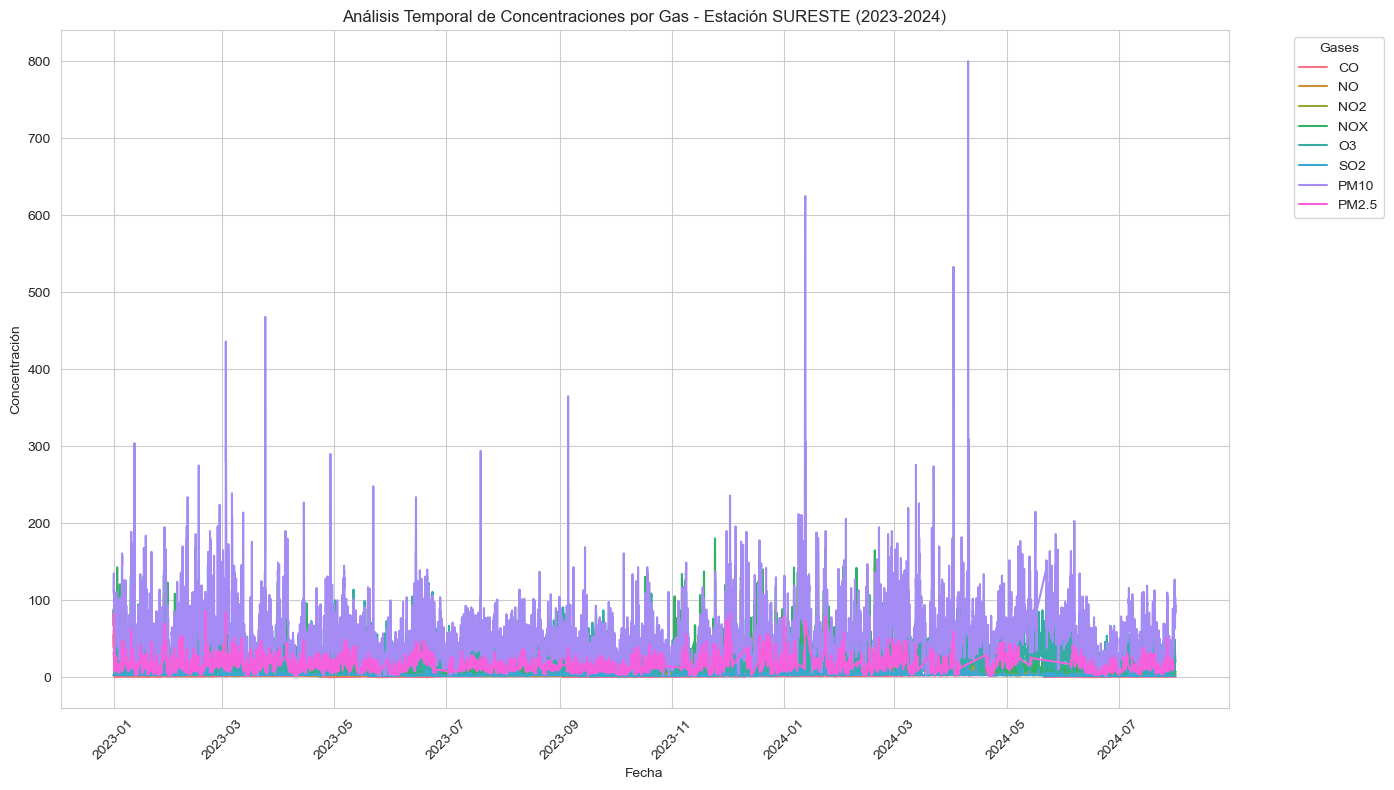

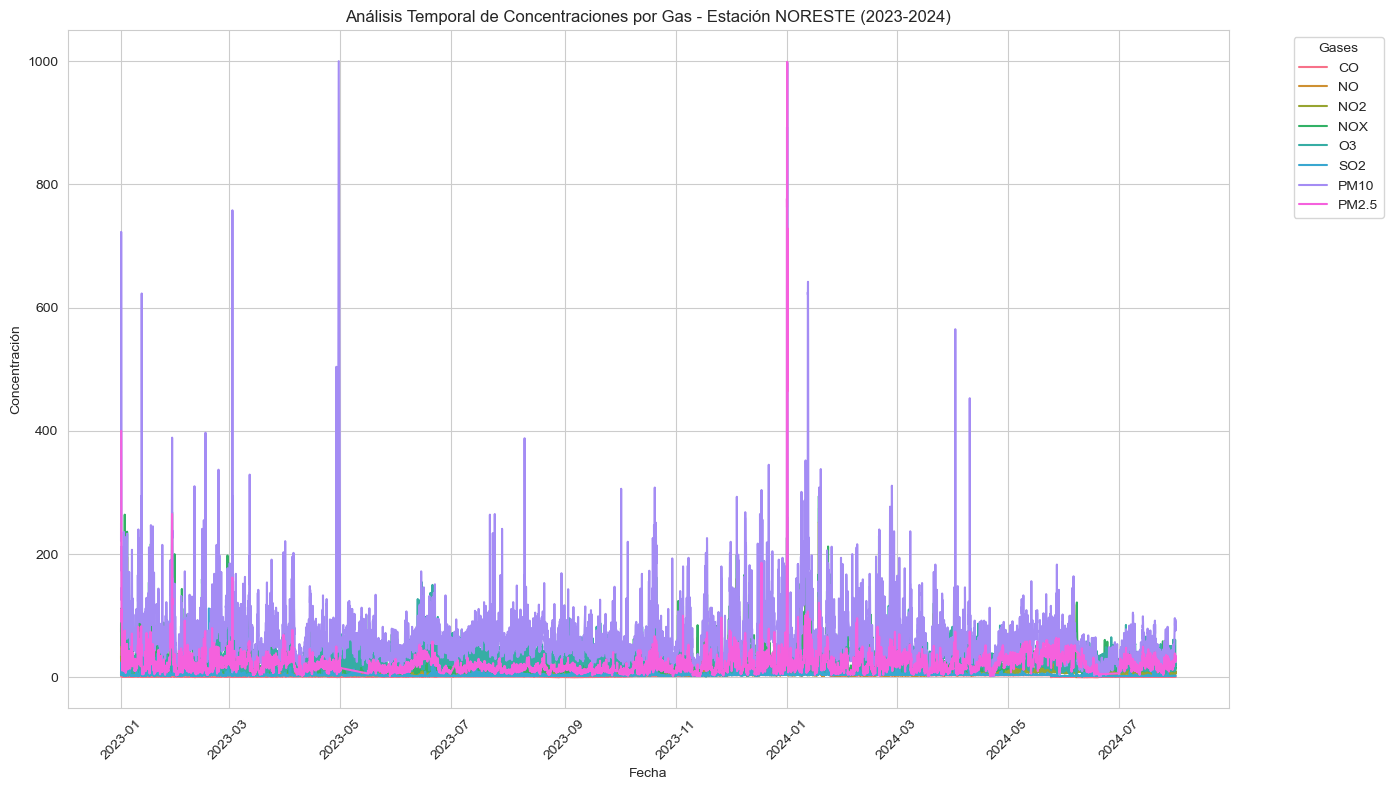

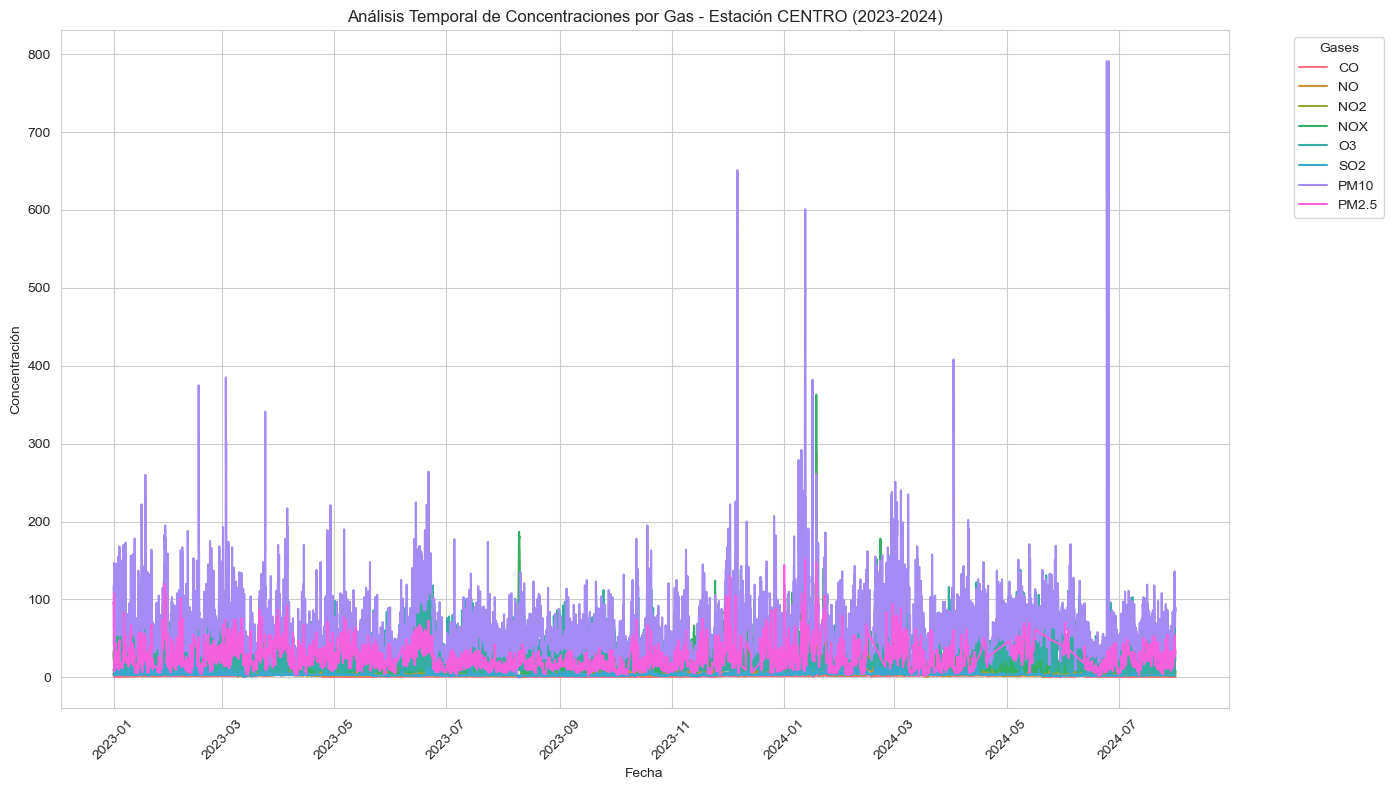

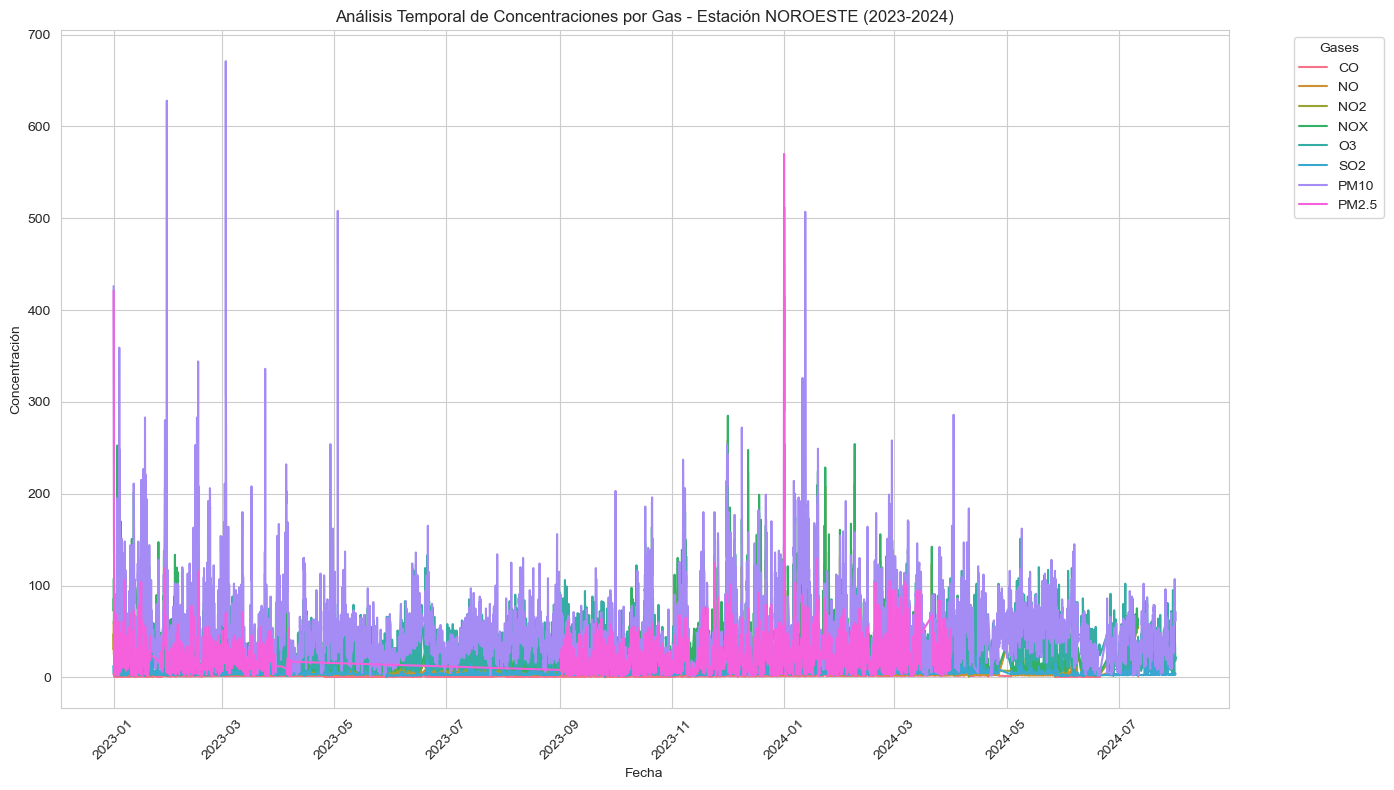

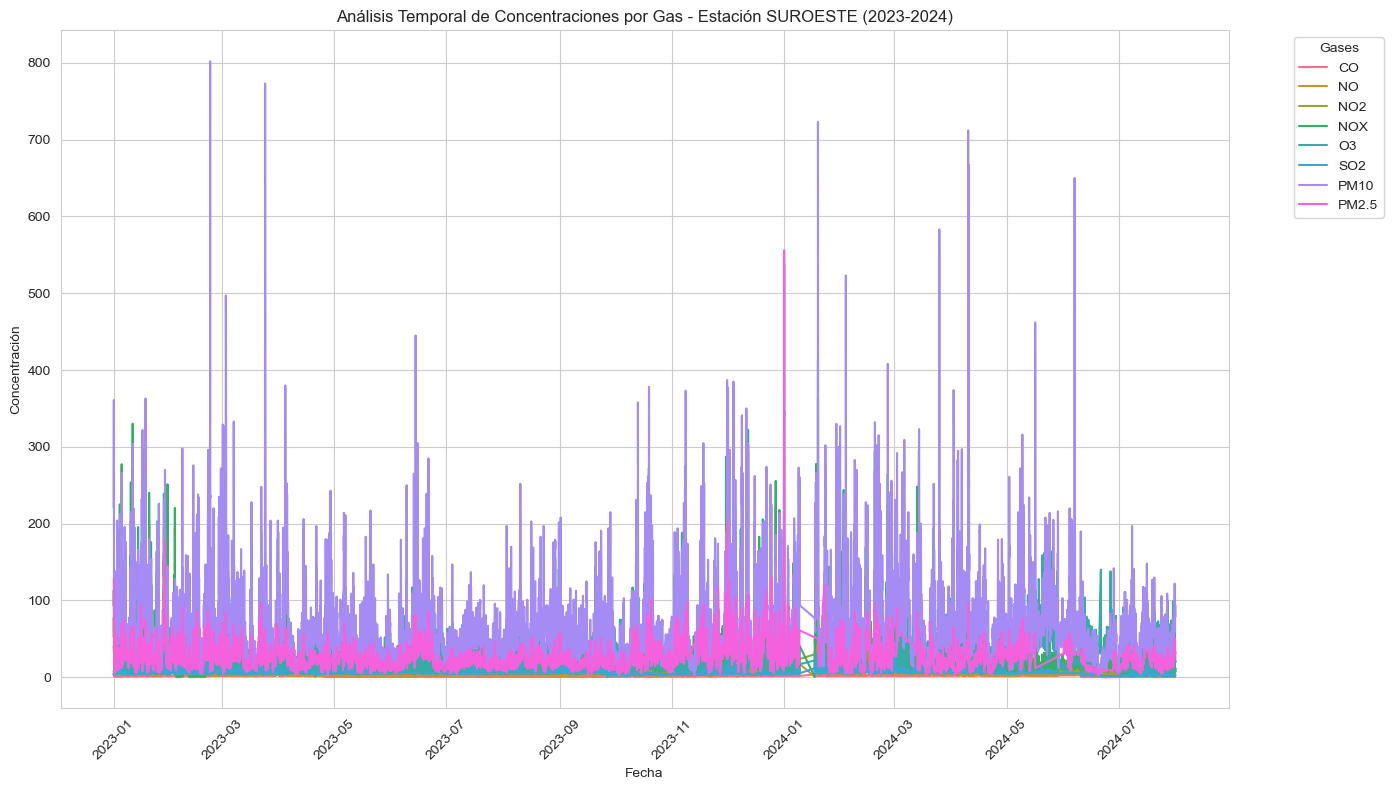

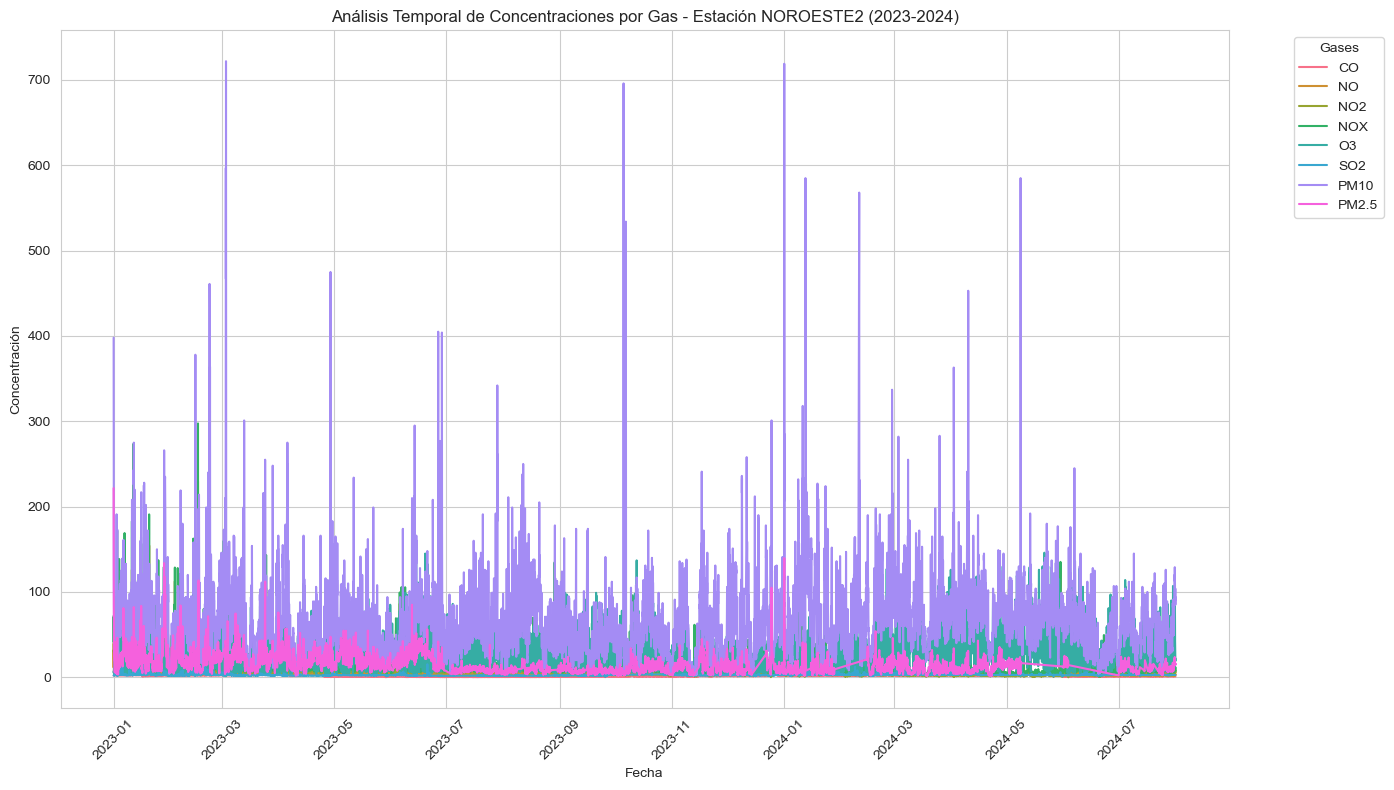

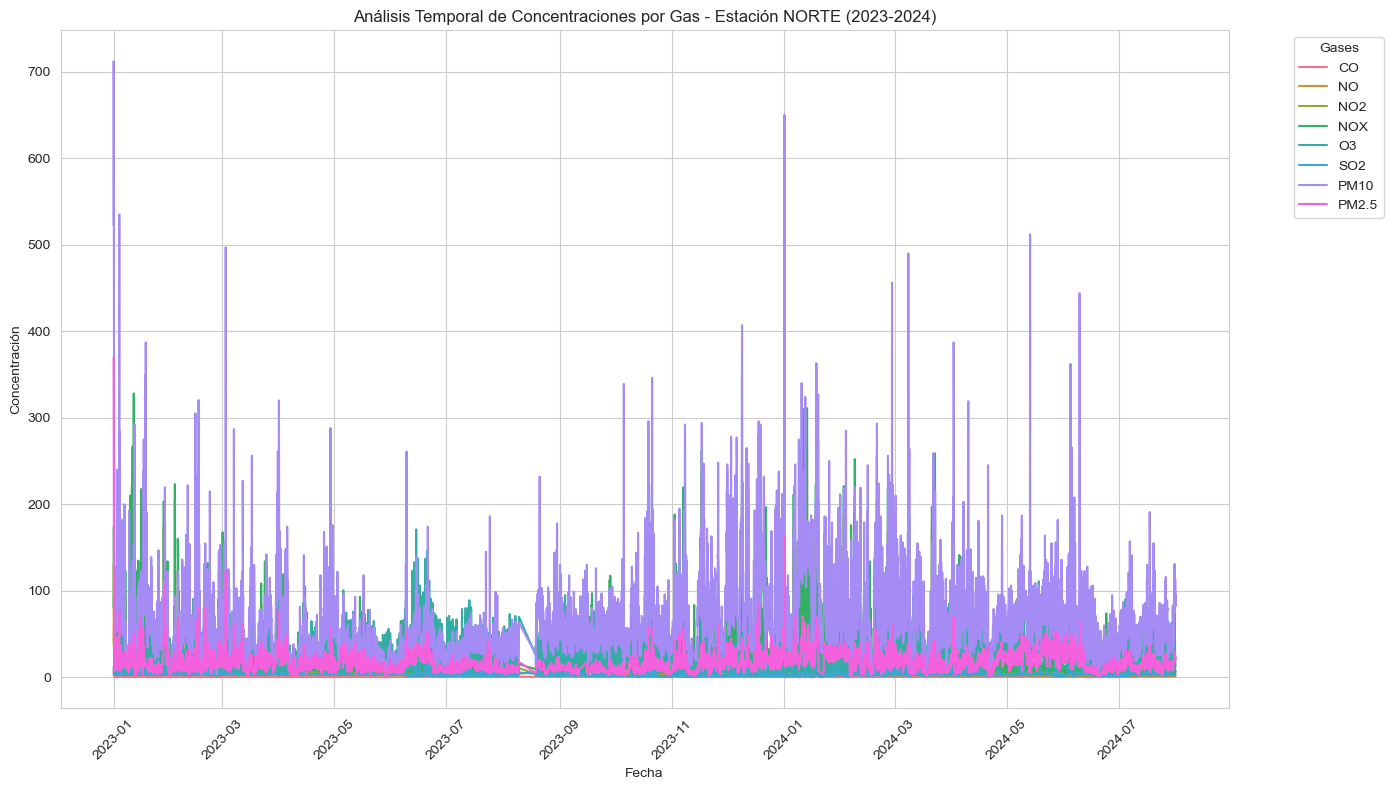

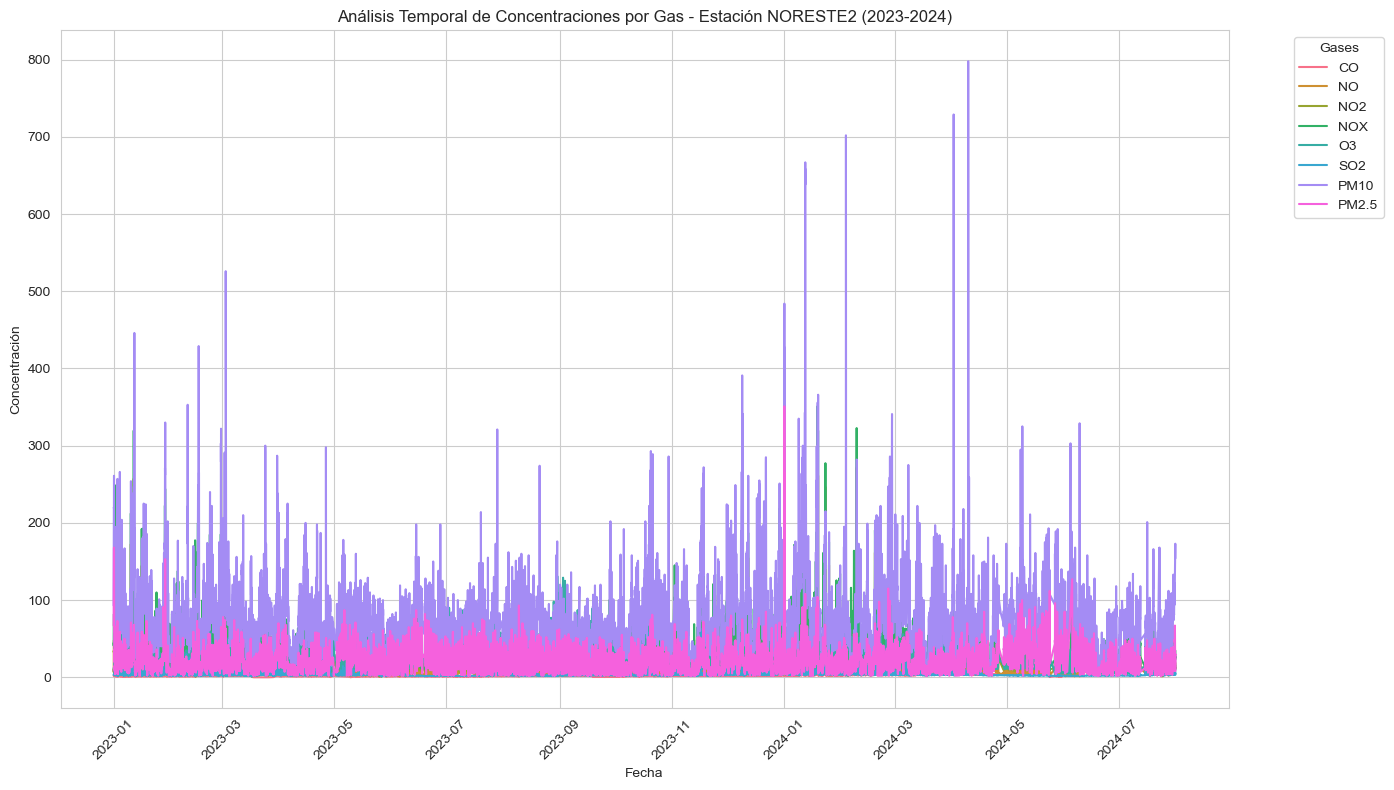

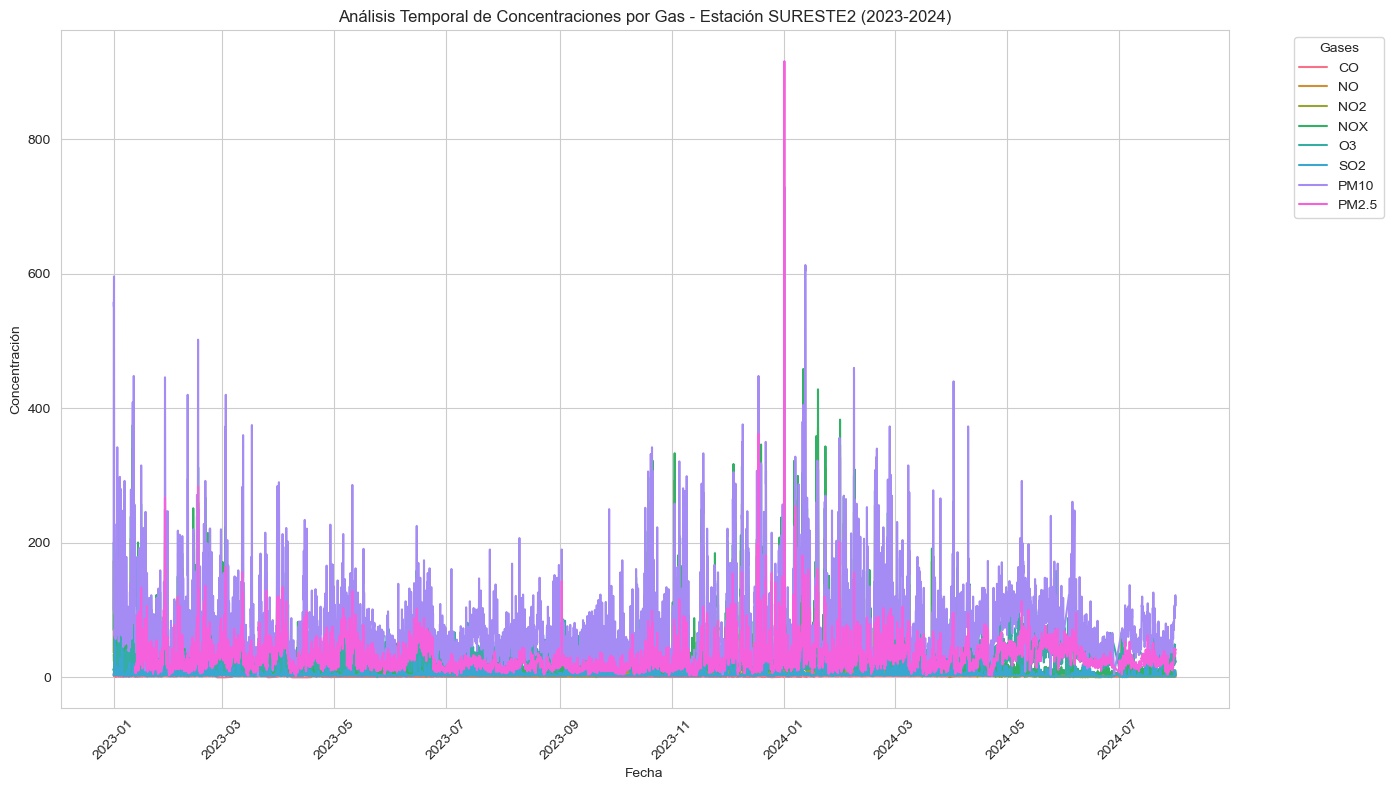

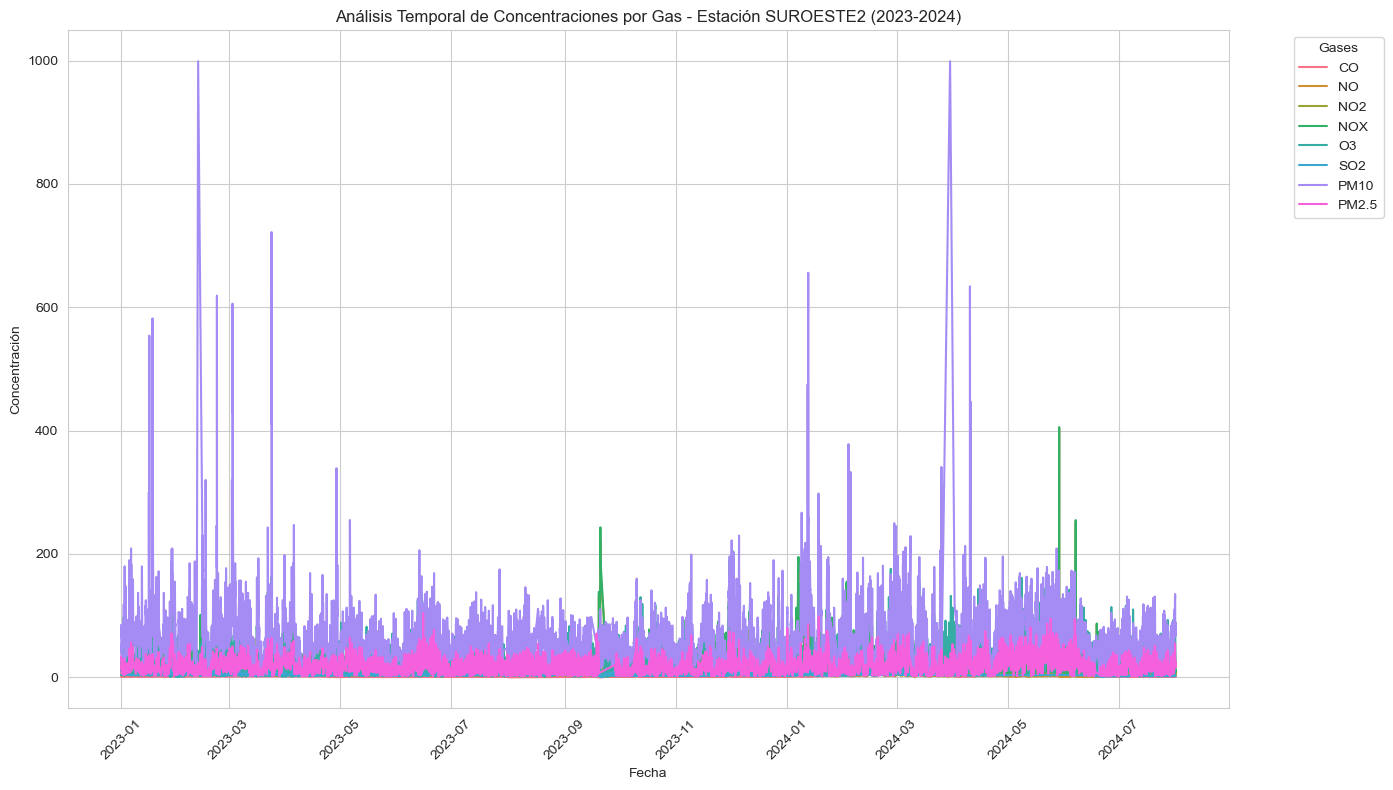

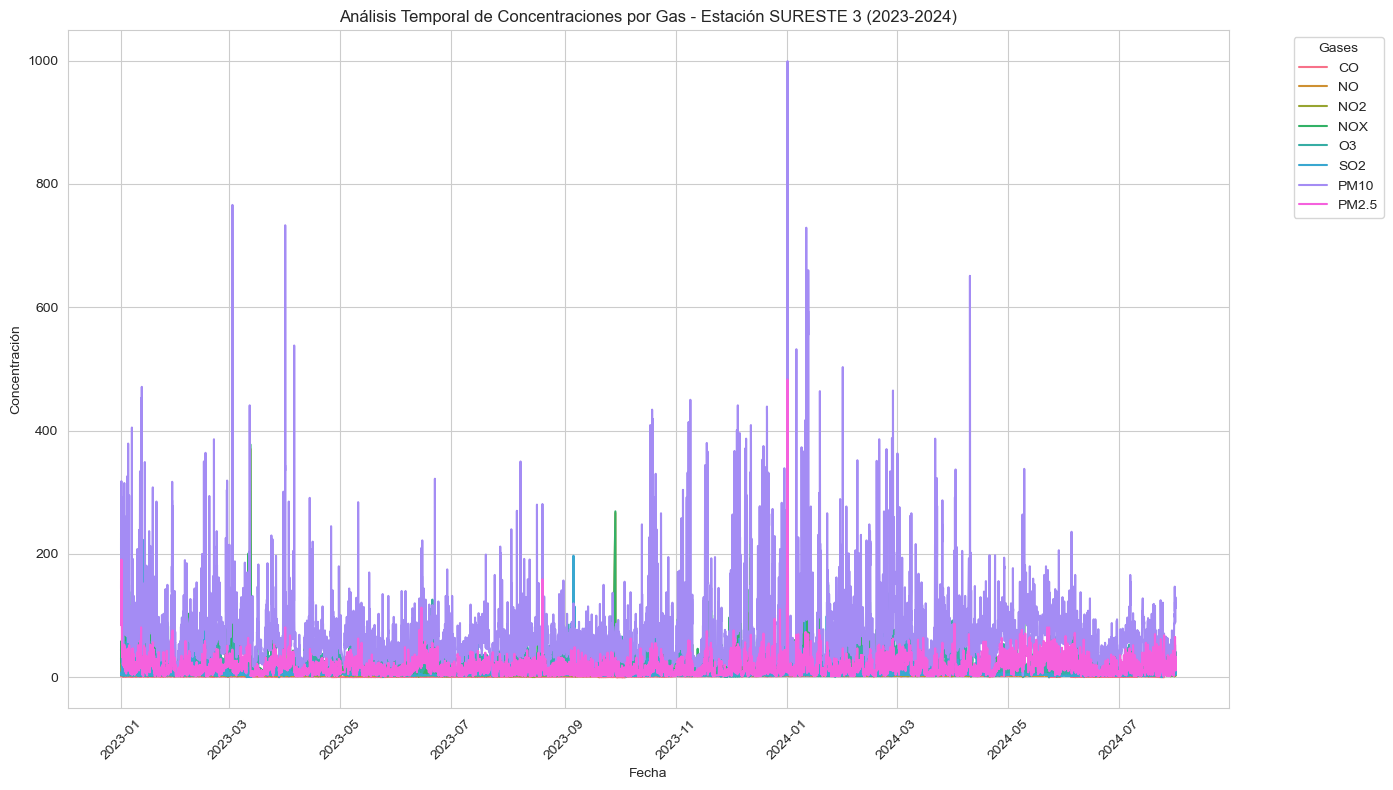

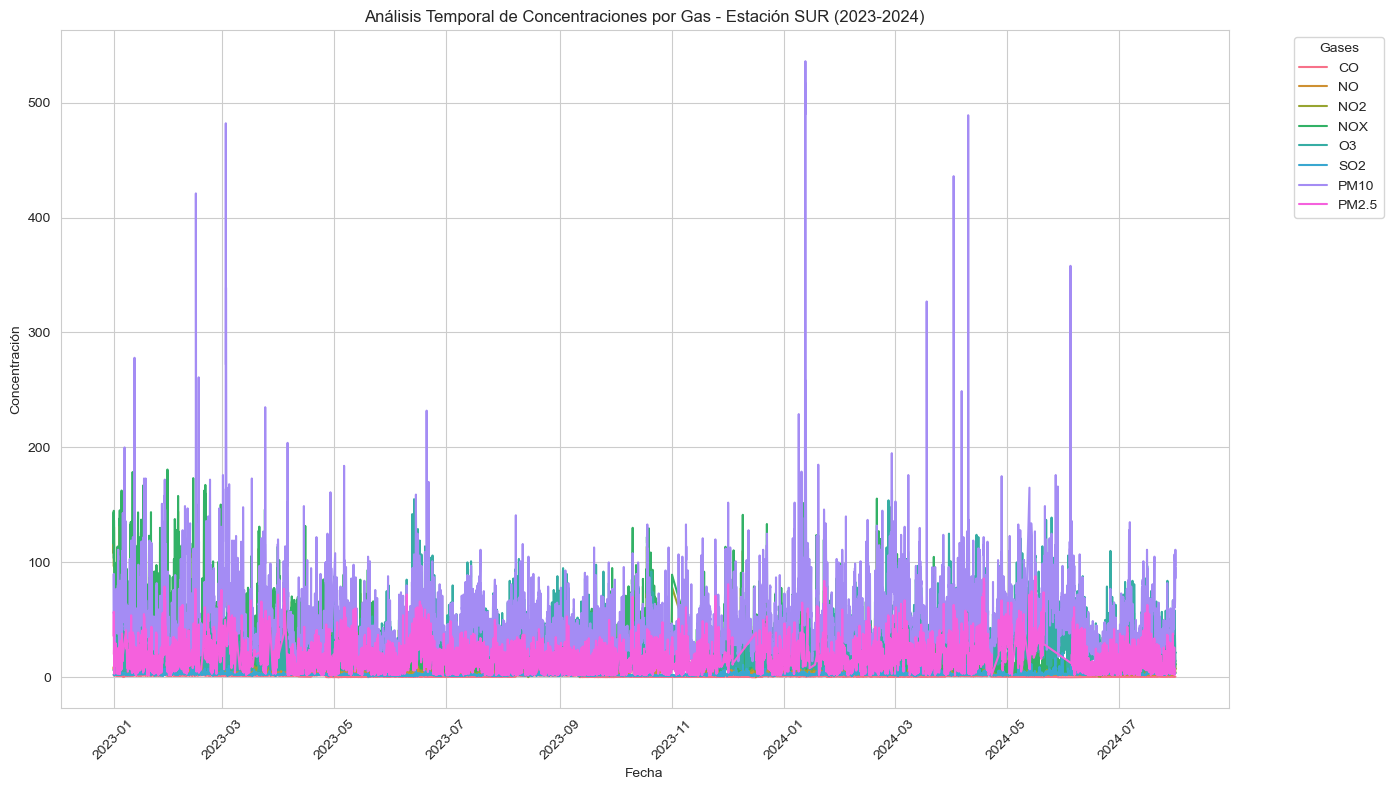

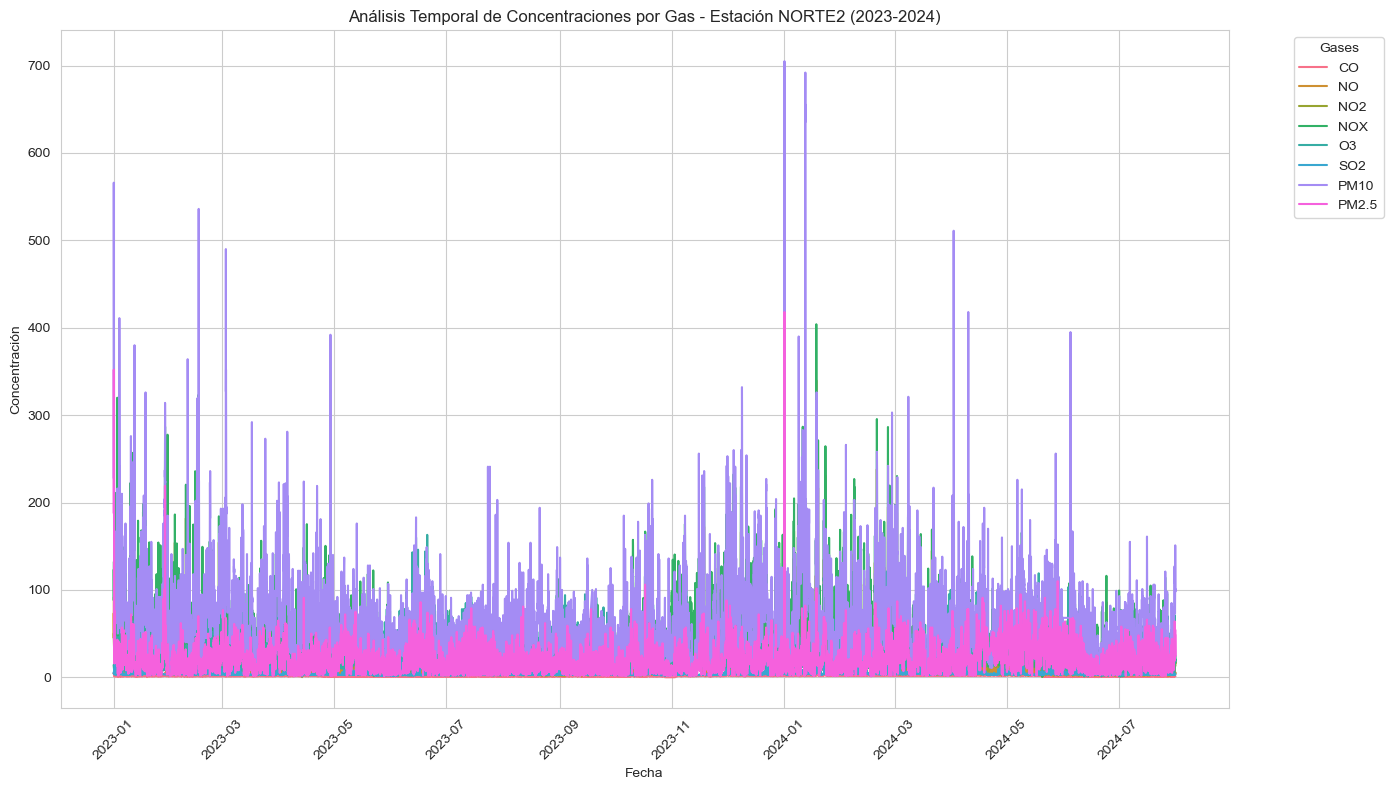

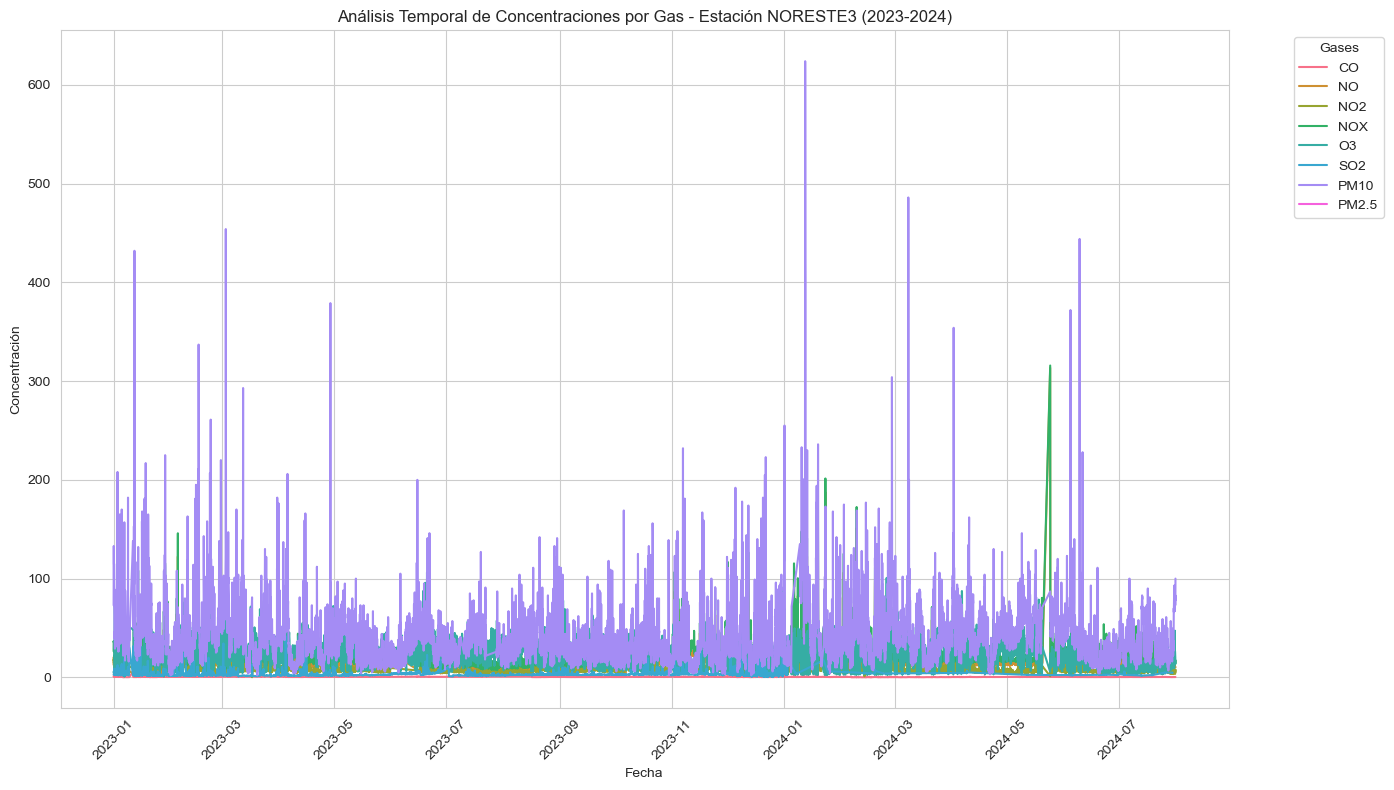

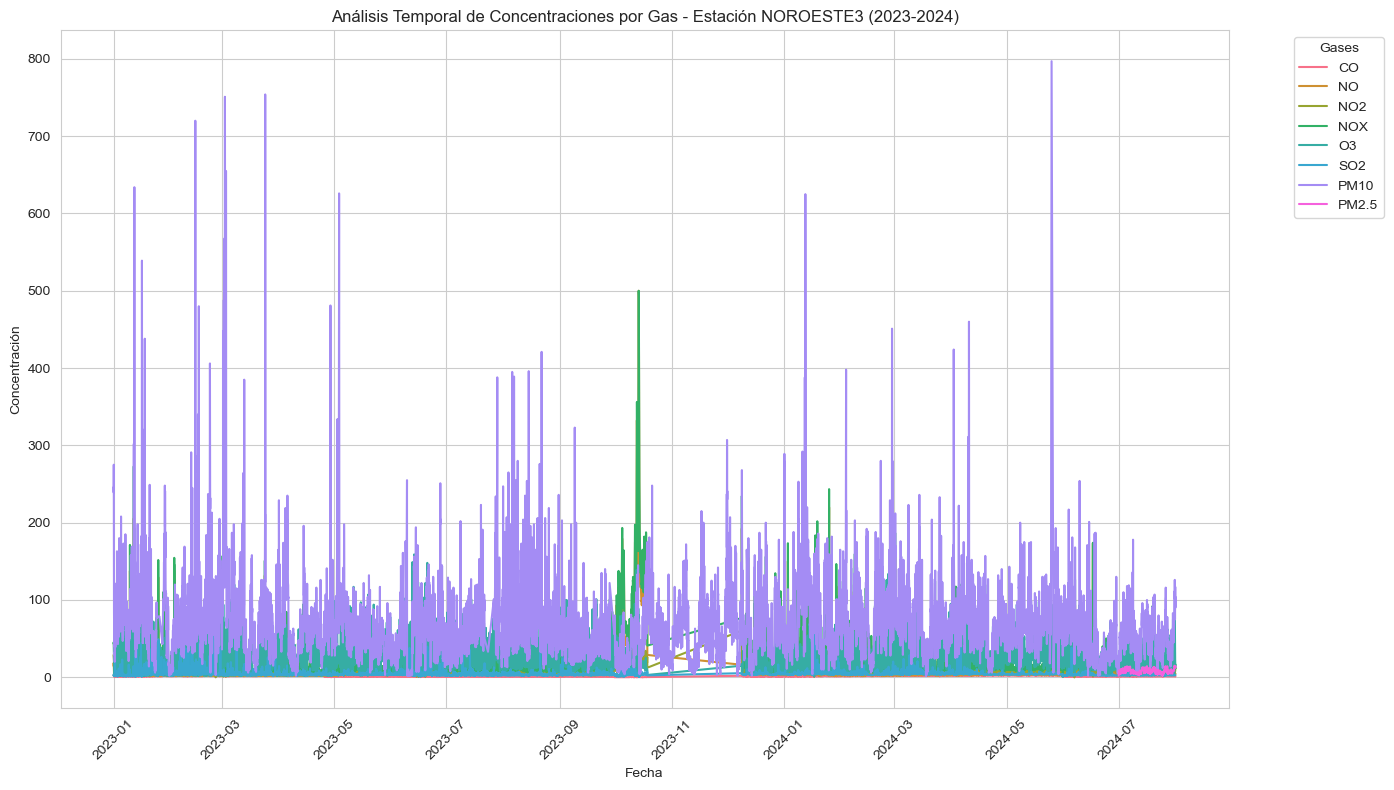

Gráficos Temporales - Dataset 2020-2022
----------------------------------------------------------------------


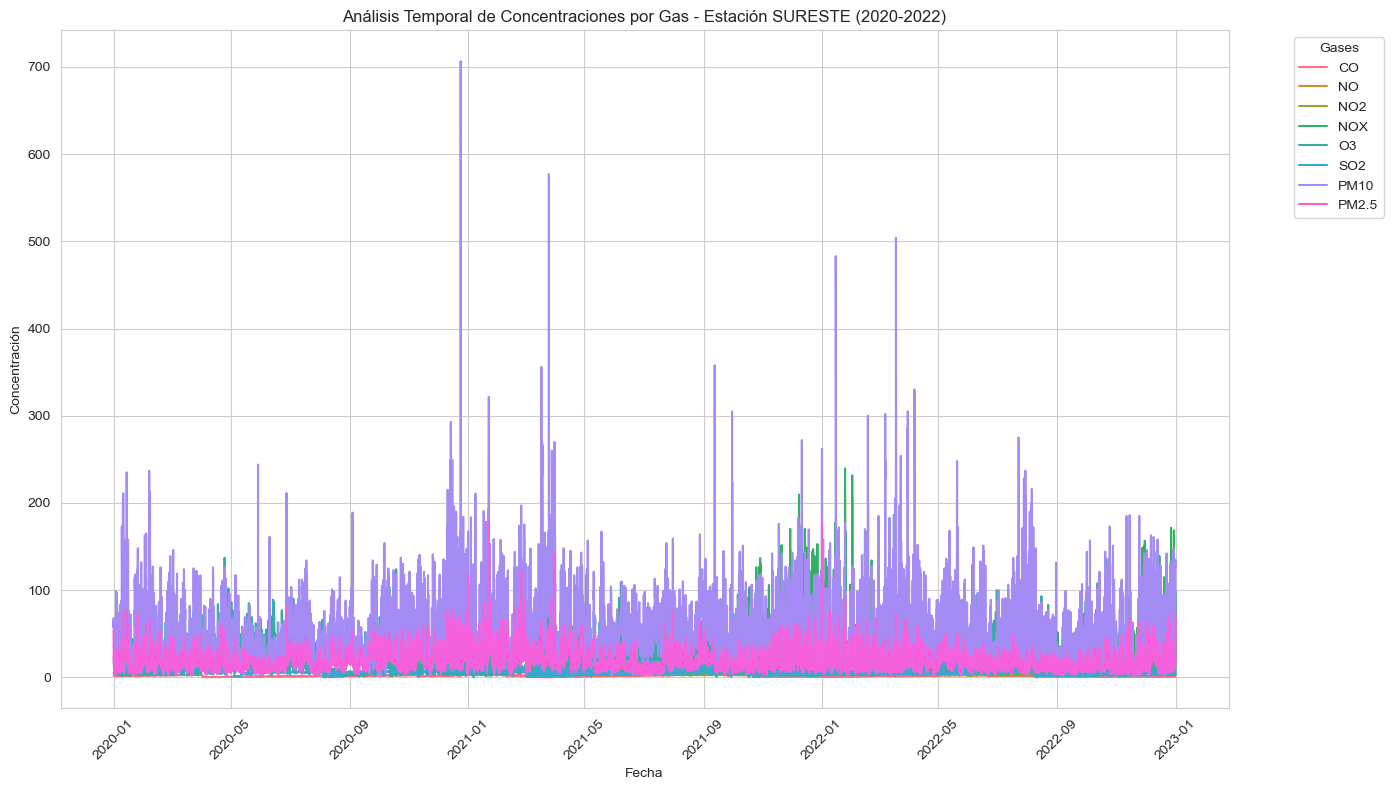

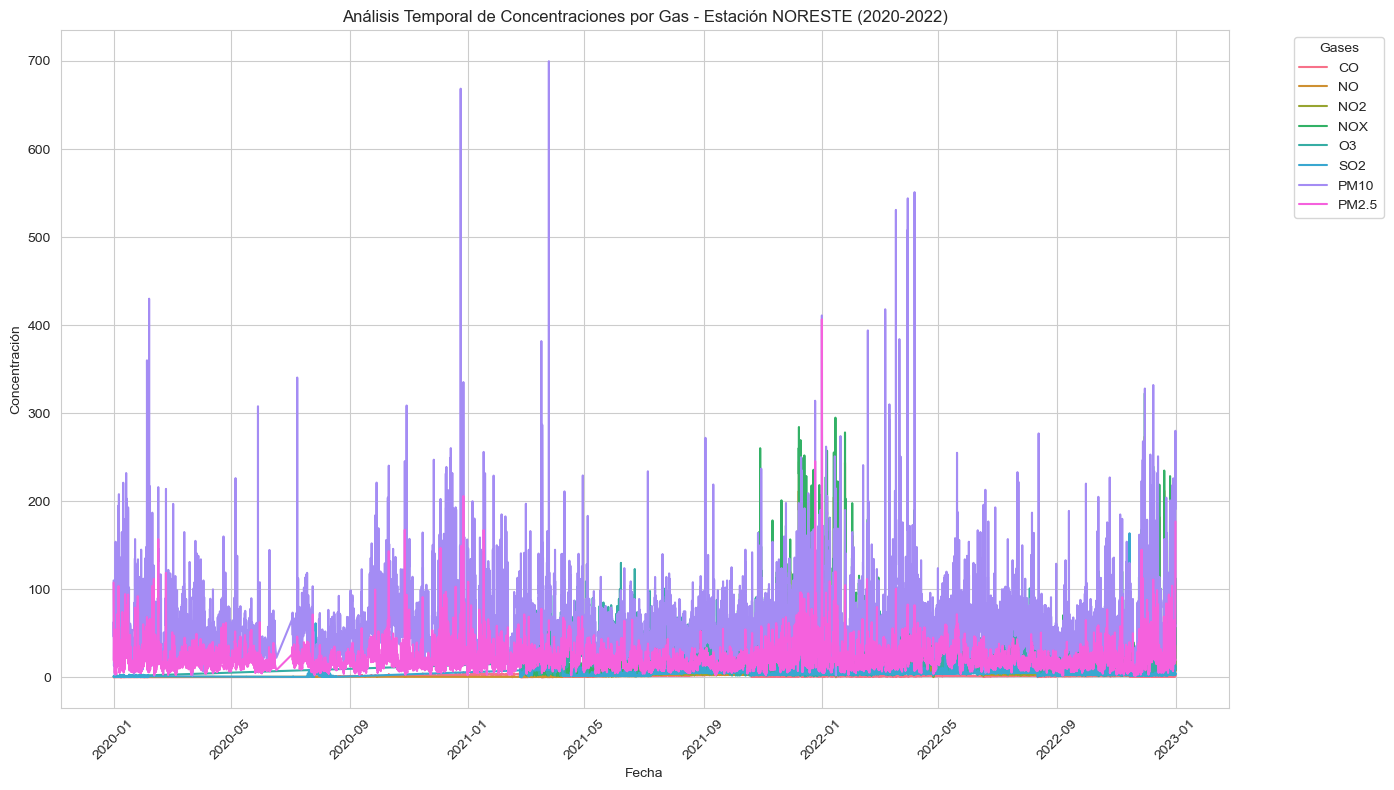

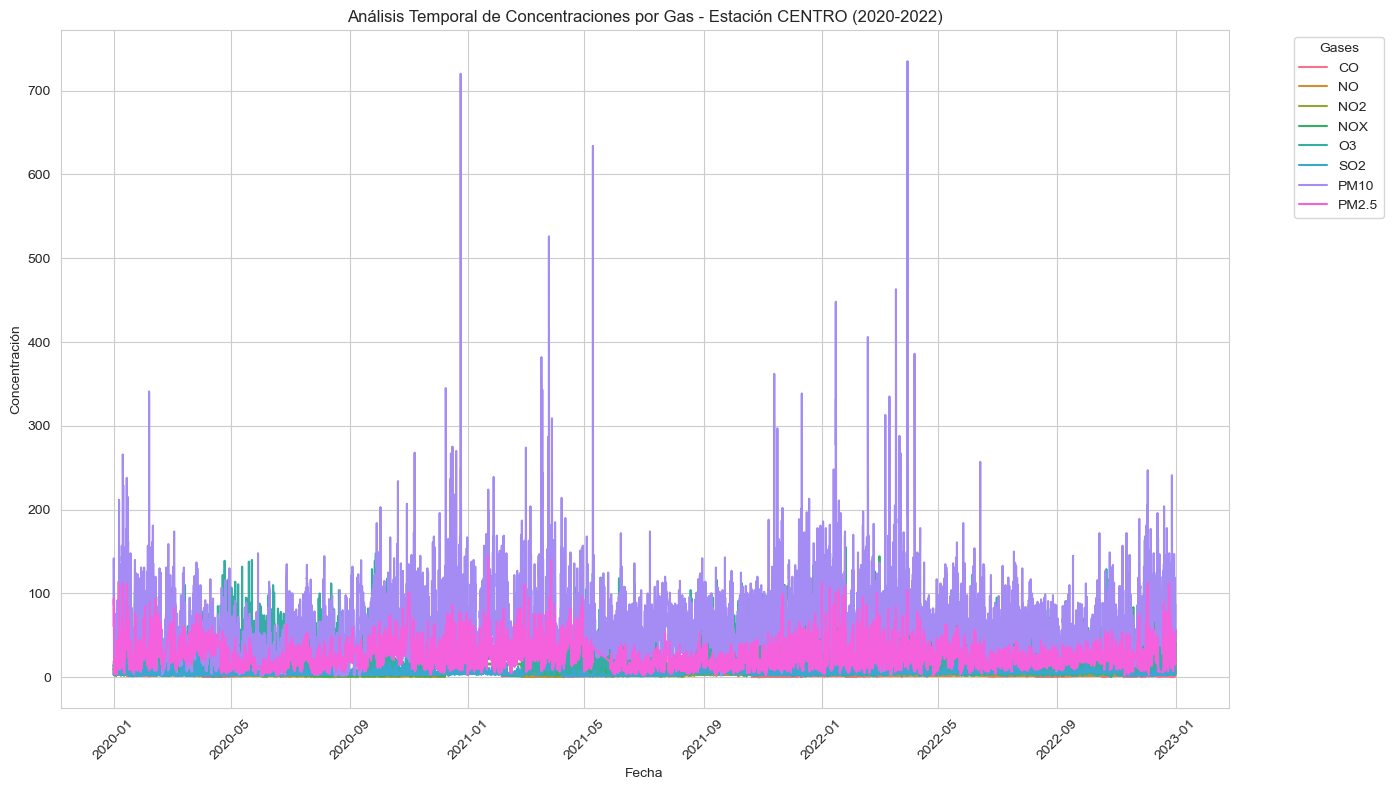

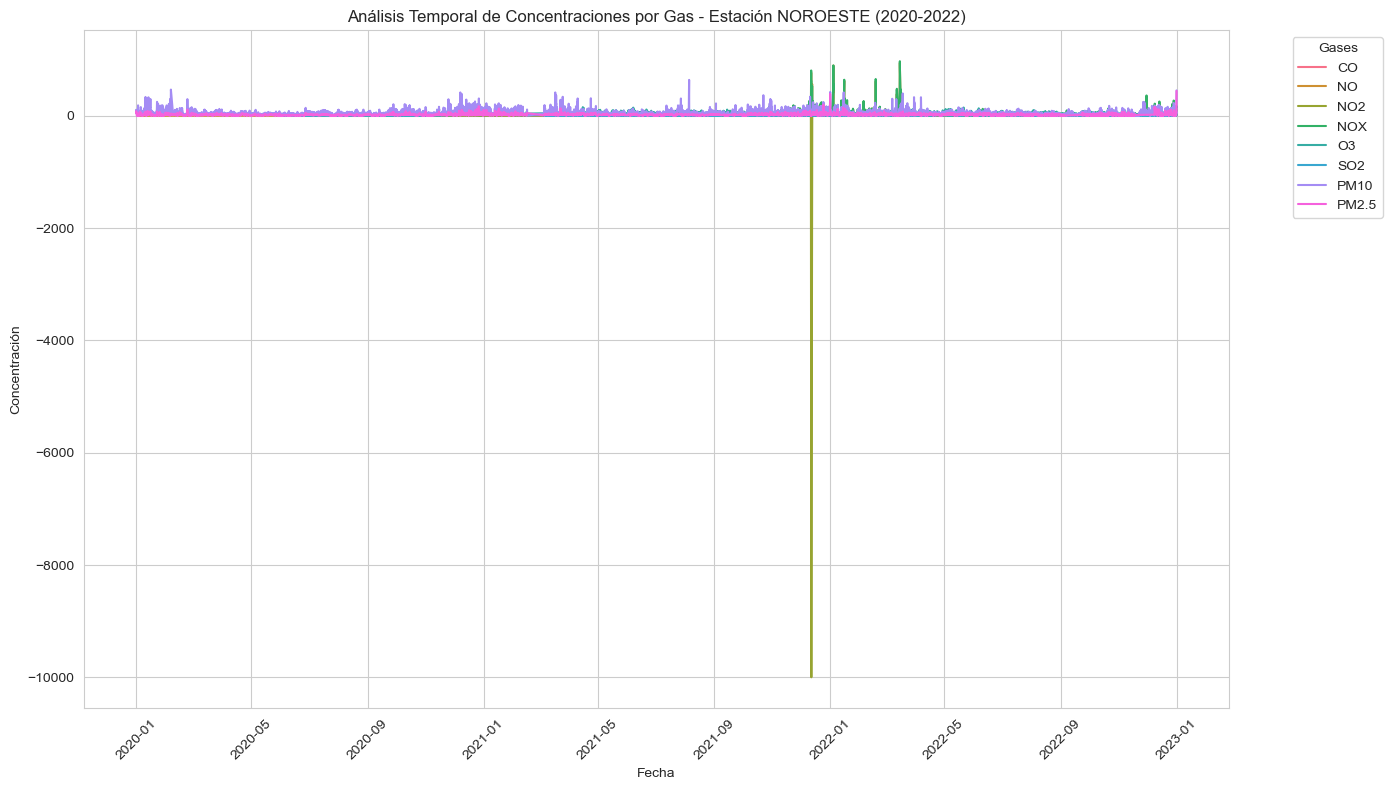

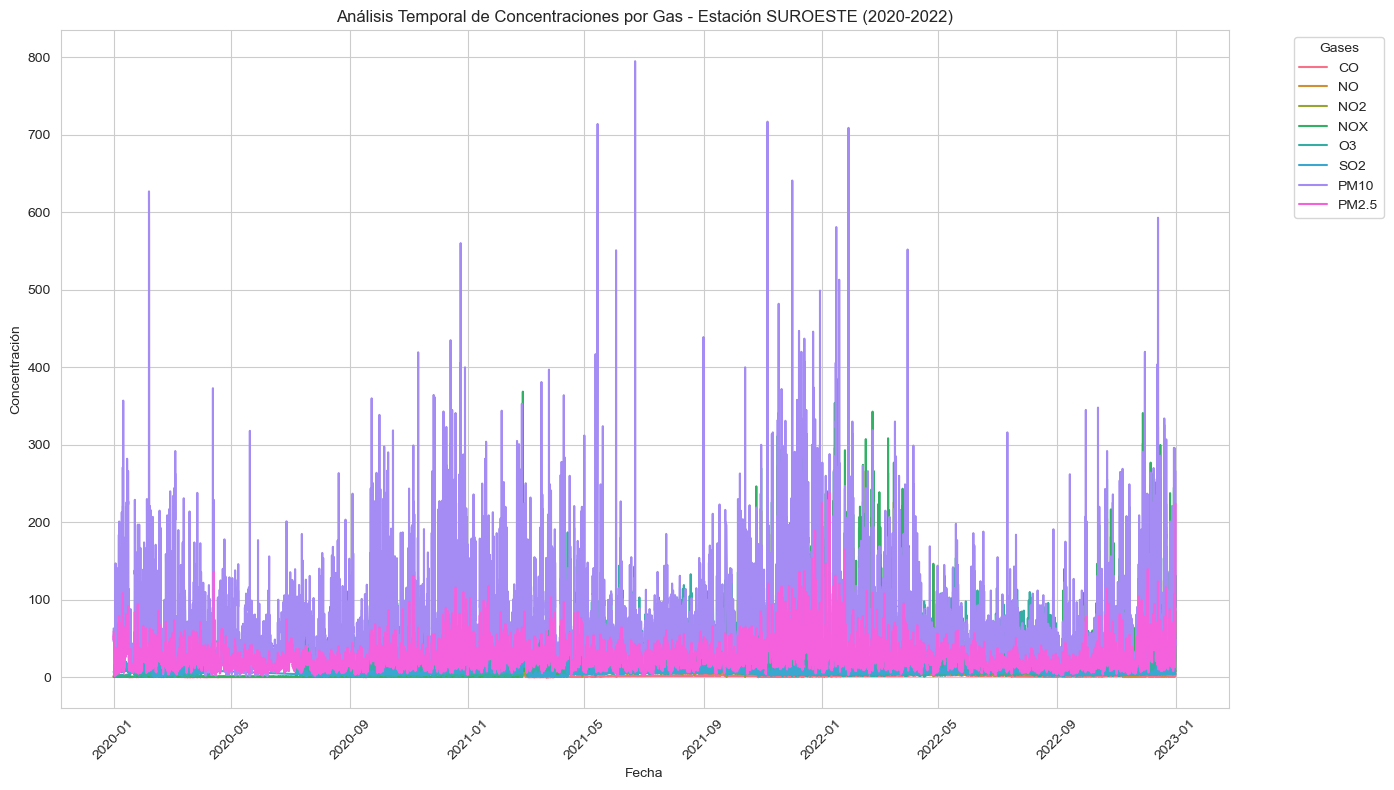

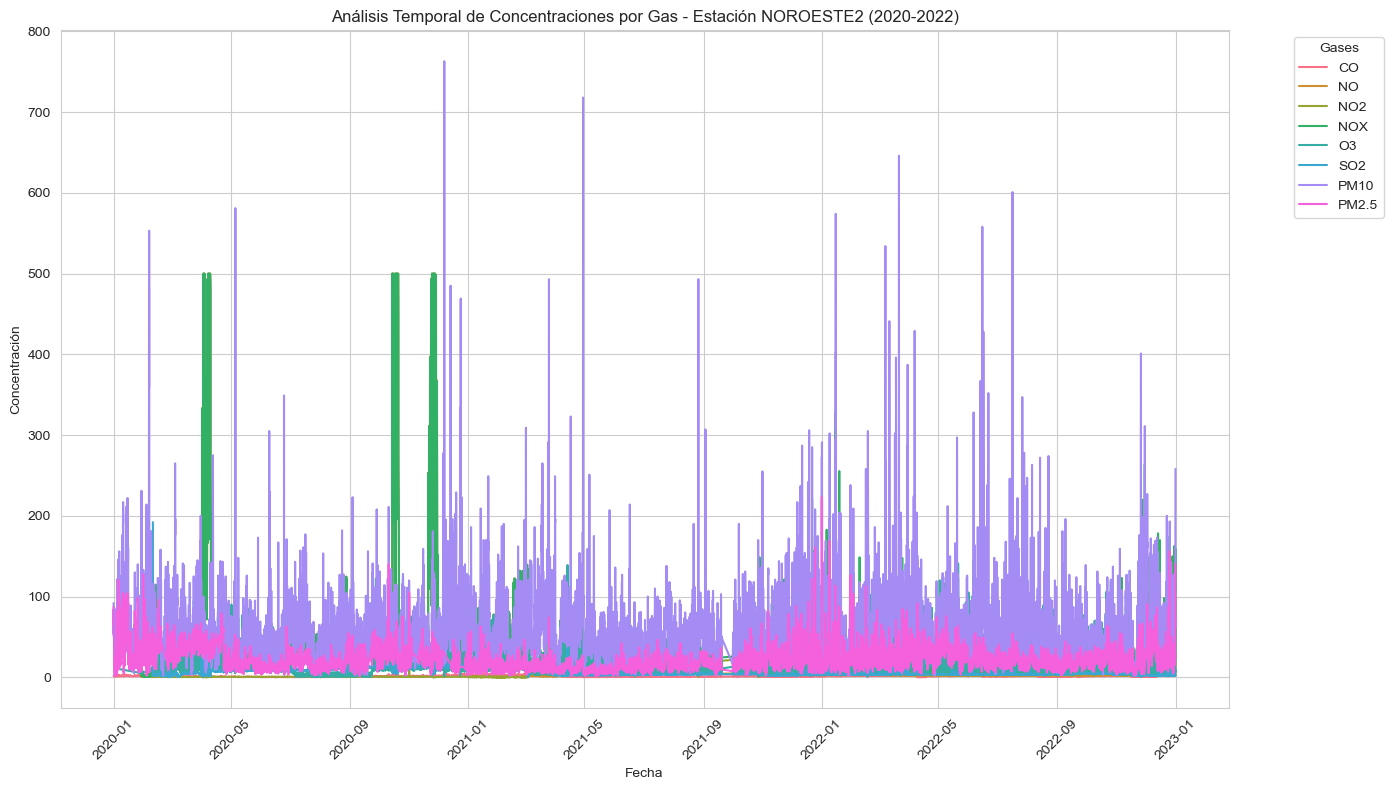

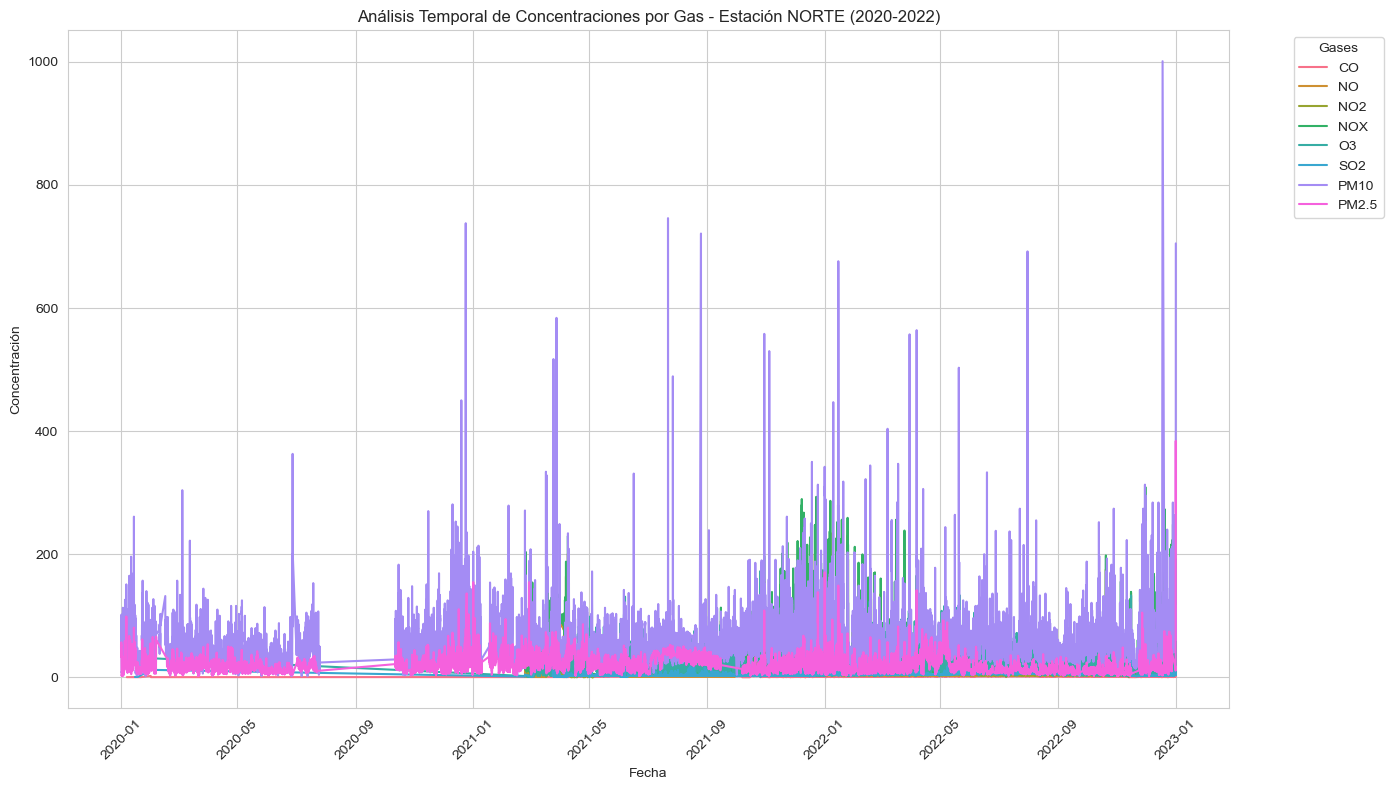

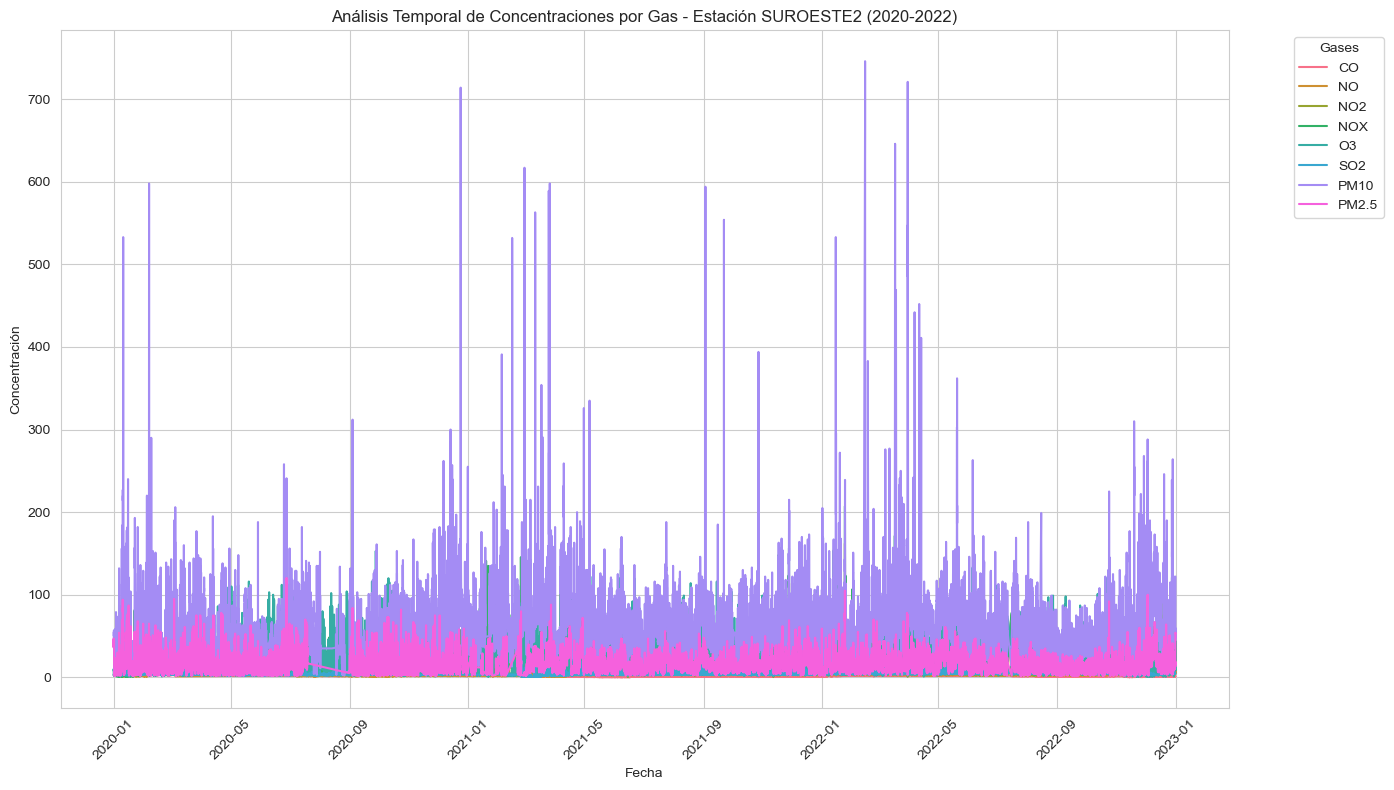

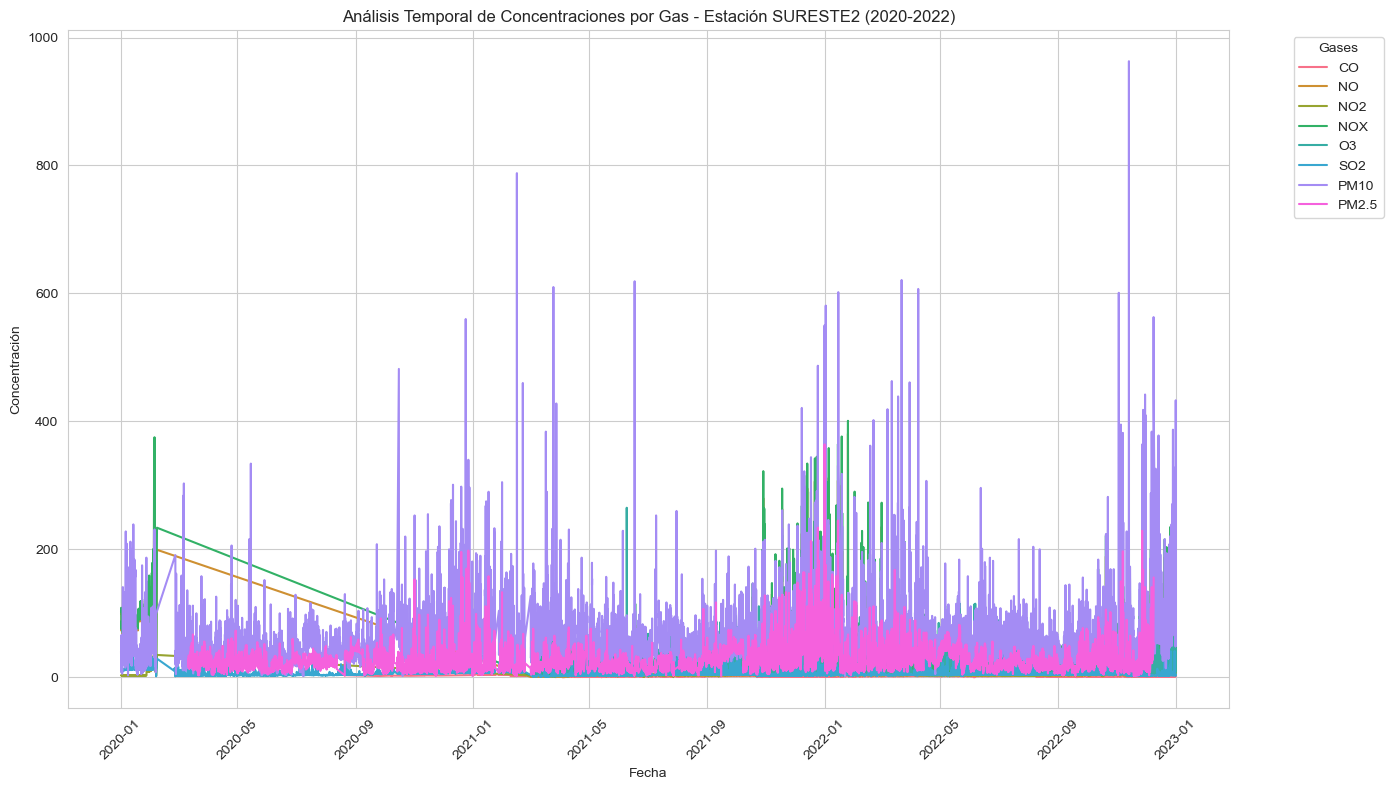

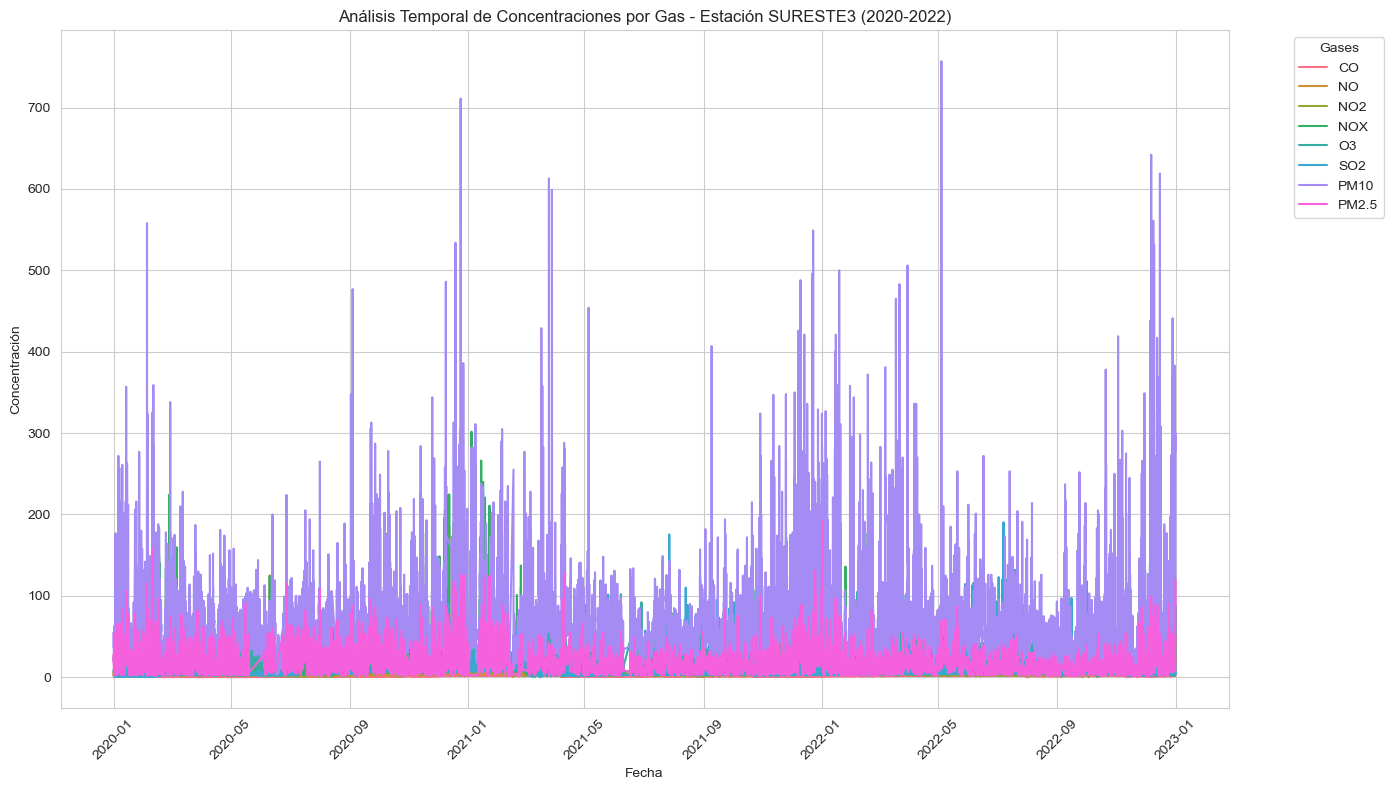

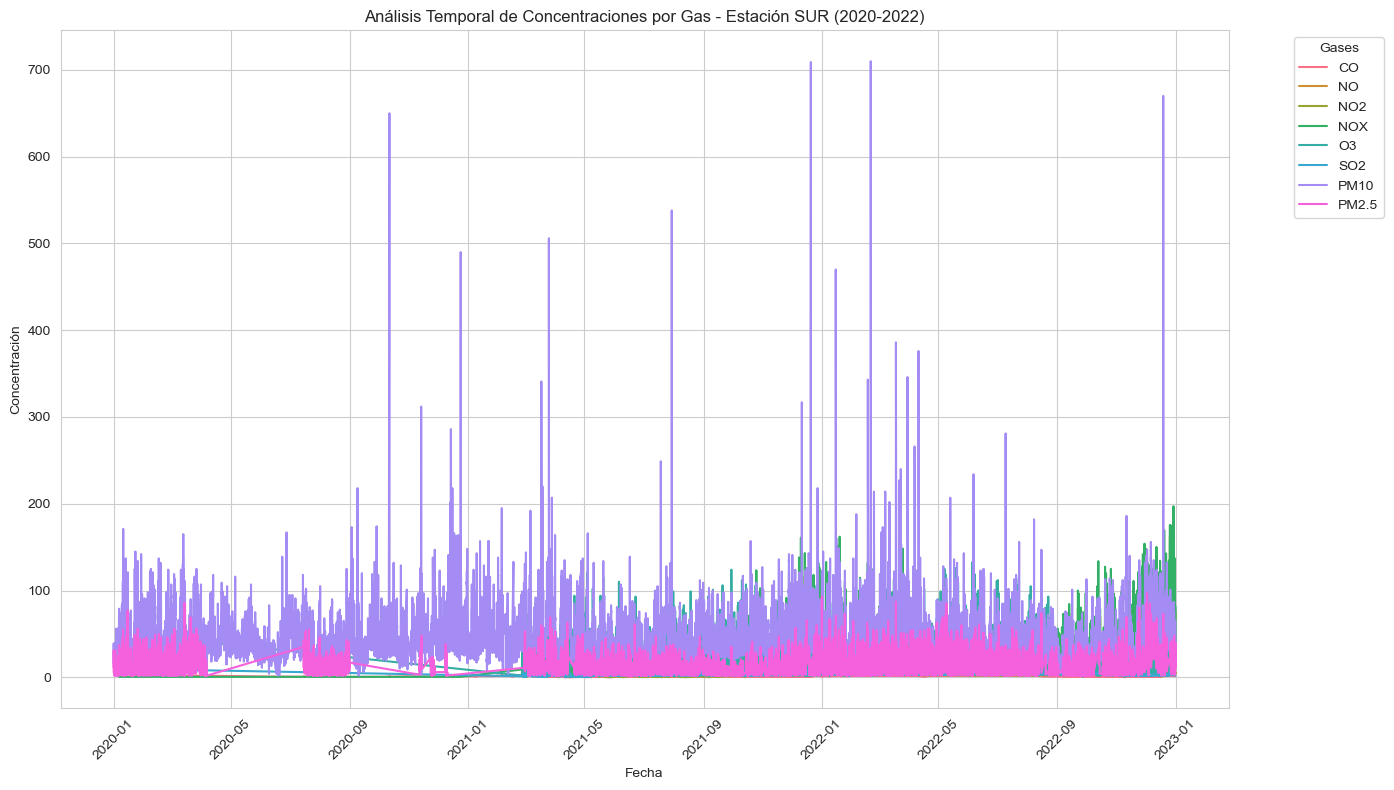

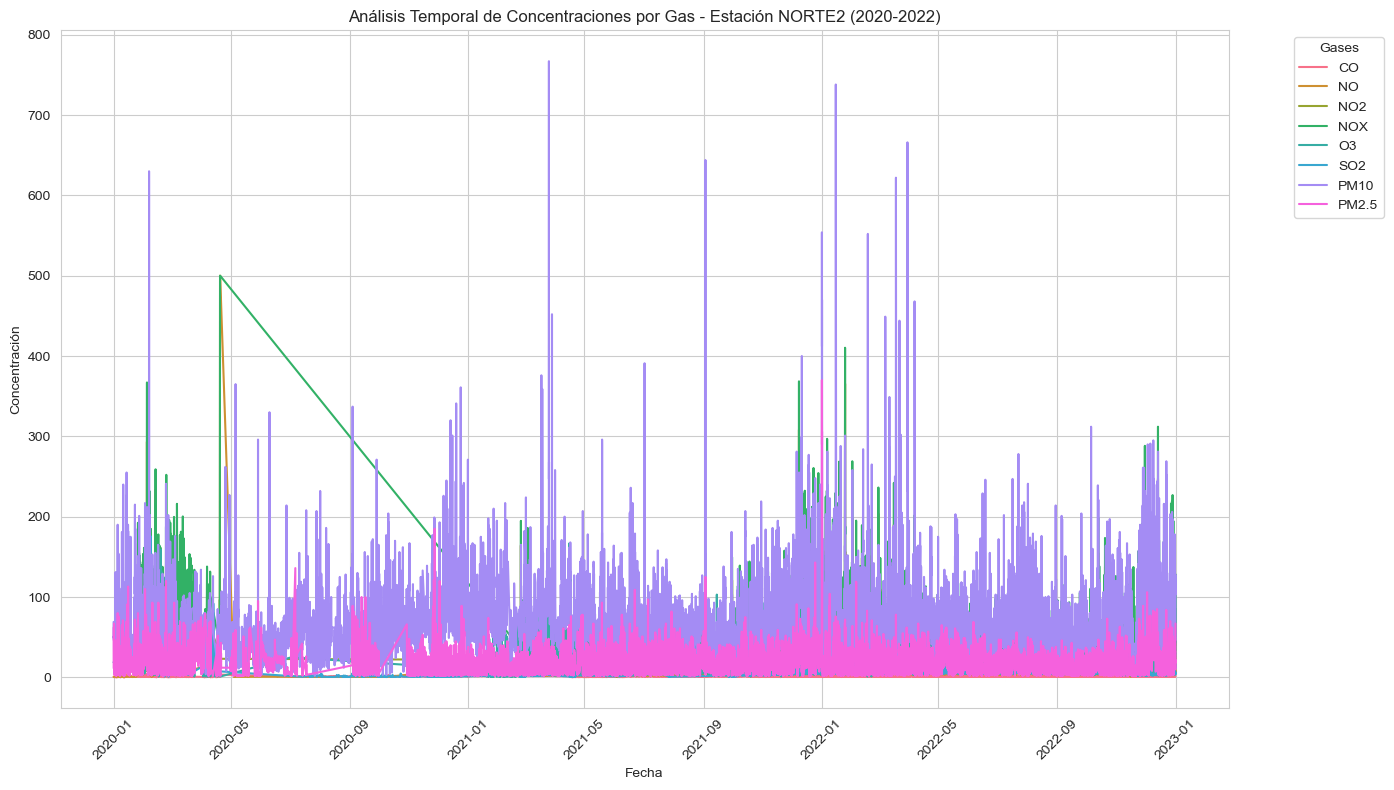

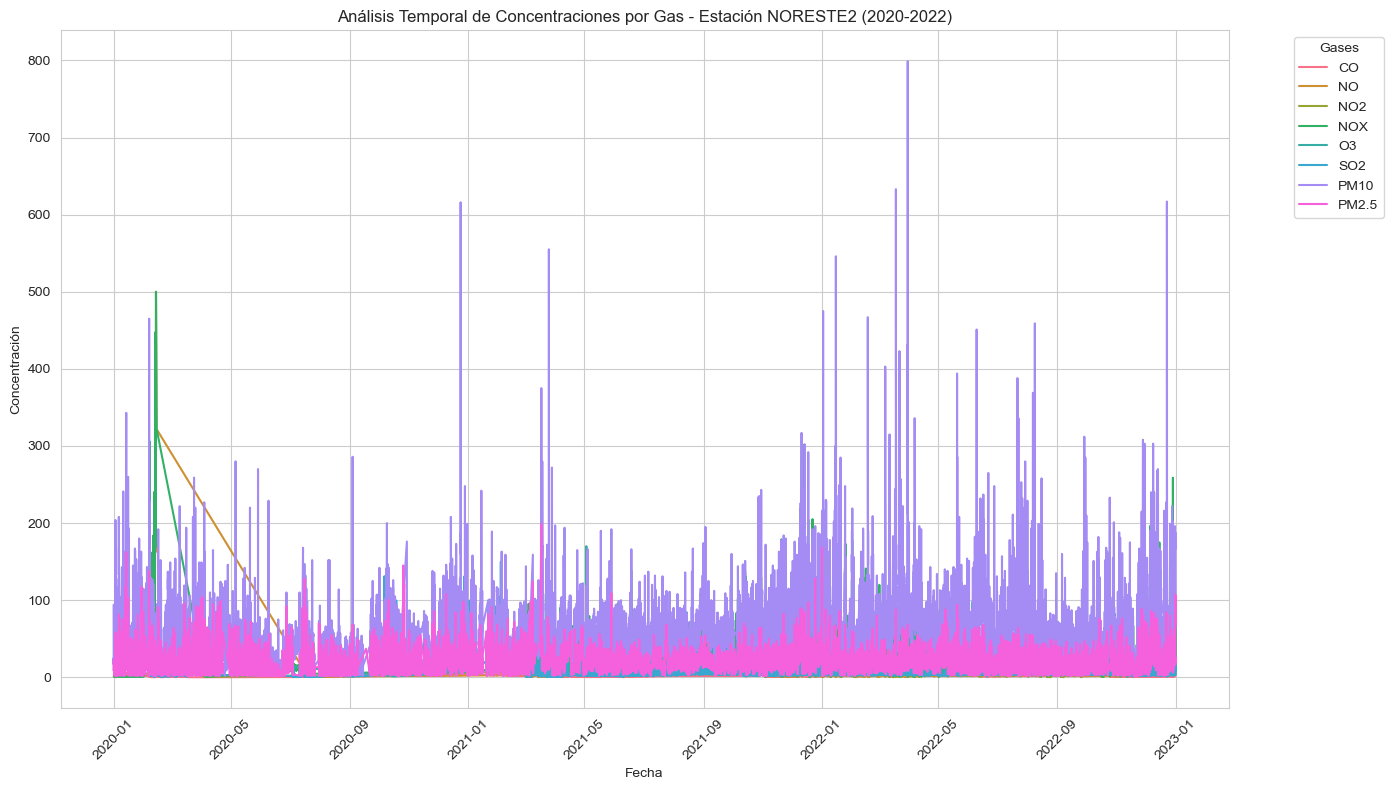

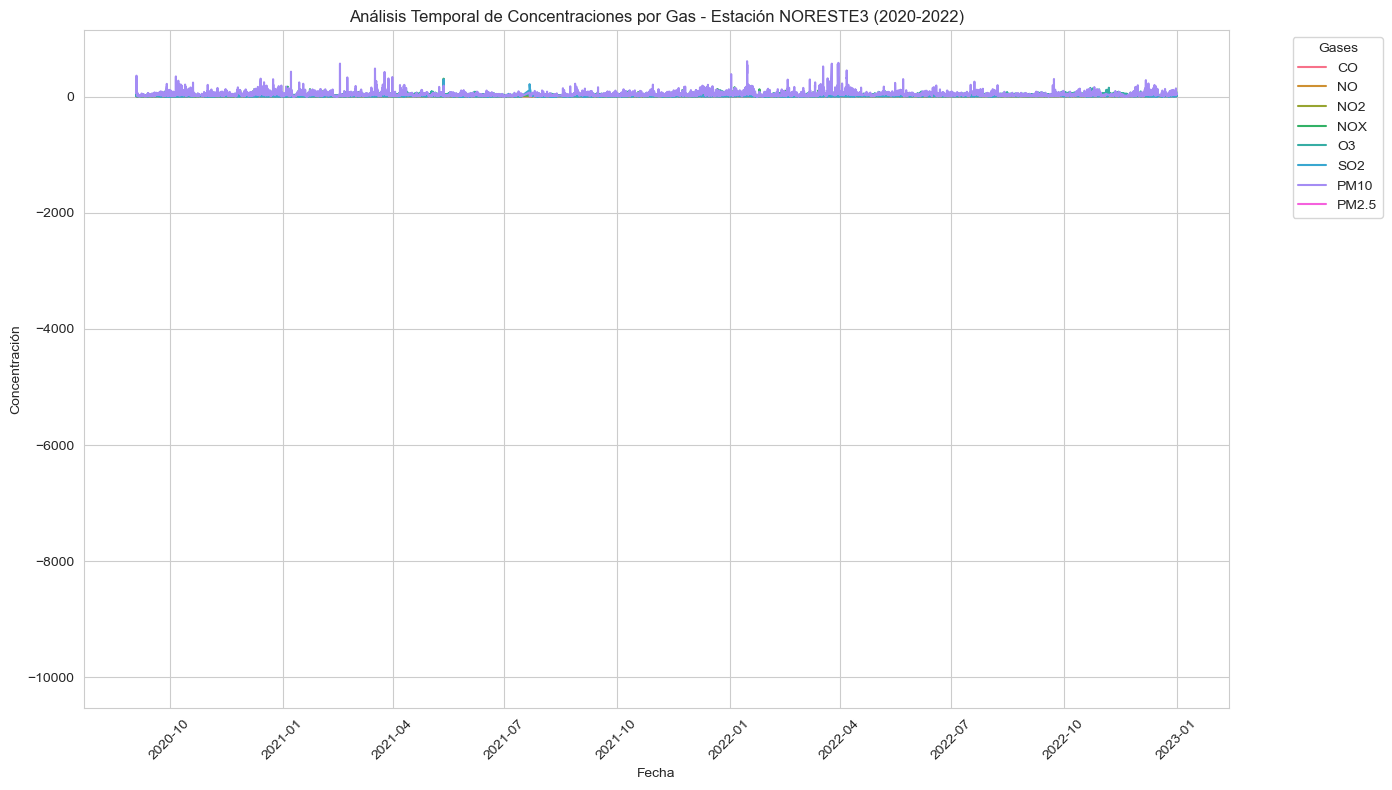

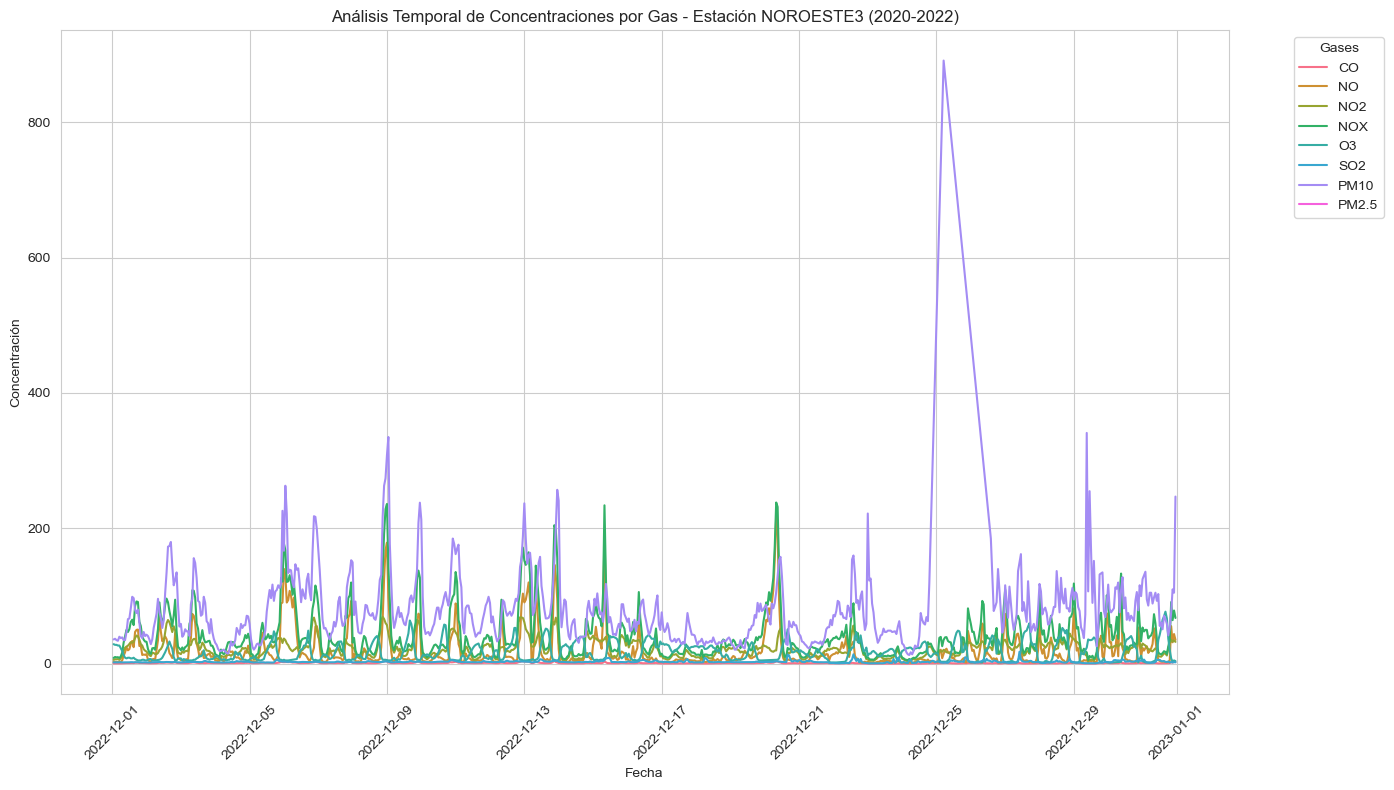

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables de gases (contaminantes) a graficar
gases = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'SO2', 'PM10', 'PM2.5']

# Función para generar gráficos temporales por estación
def plot_temporal_por_estacion(dataset: dict, dataset_name: str):
    """
    Genera un gráfico temporal por estación, mostrando la concentración de cada gas en colores distintos.
    - Asume que cada dataframe en el dataset tiene una columna 'date' (datetime) y columnas de gases.
    - Ignora estaciones sin 'date' o sin gases presentes.
    """
    for station in dataset:
        df = dataset[station]
        if not isinstance(df, pd.DataFrame) or df.empty or 'date' not in df.columns:
            print(f"Estación {station} no tiene datos válidos o columna 'date'. Saltando.")
            continue
        
        # Asegurar que 'date' sea datetime y establecer como índice
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df = df.set_index('date').sort_index()
        
        # Filtrar solo columnas de gases presentes
        gases_presentes = [gas for gas in gases if gas in df.columns]
        if len(gases_presentes) == 0:
            print(f"Estación {station} no tiene gases disponibles. Saltando.")
            continue
        
        # Crear figura para el gráfico
        plt.figure(figsize=(14, 8))
        sns.set_style("whitegrid")
        
        # Graficar cada gas en una línea con color distinto
        palette = sns.color_palette("husl", n_colors=len(gases_presentes))  # Colores distintos
        for i, gas in enumerate(gases_presentes):
            sns.lineplot(data=df, x=df.index, y=gas, label=gas, color=palette[i], linewidth=1.5)
        
        # Configuración del gráfico
        plt.title(f'Análisis Temporal de Concentraciones por Gas - Estación {station} ({dataset_name})')
        plt.xlabel('Fecha')
        plt.ylabel('Concentración')
        plt.legend(title='Gases', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Generar gráficos para 2023-2024
print("="*70)
print("Gráficos Temporales - Dataset 2023-2024")
print("-"*70)
plot_temporal_por_estacion(db_2023_2024_variablesImportantes, "2023-2024")

# Generar gráficos para 2020-2022
print("="*70)
print("Gráficos Temporales - Dataset 2020-2022")
print("-"*70)
plot_temporal_por_estacion(db_2020_2022_variablesImportantes, "2020-2022")

Histogramas o Boxplots: Para ver la distribución de cada gas en ambas estaciones (ej. ¿PM2.5 tiene más valores extremos en la industrial?).
Series temporales: Plotea gases vs fecha para detectar tendencias (ej. picos de NO2 en invierno).
Pairplot: Para explorar relaciones entre gases (ej. ¿CO y NOX están correlacionados por venir de combustión?).
Gráficos comparativos: Boxplots o barras para comparar medias de gases entre estaciones.

In [37]:
import pandas as pd
import numpy as np

# Definir las variables de gases
gases = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'SO2', 'PM10', 'PM2.5']

# Función para calcular y mostrar el ranking de estaciones por contaminación
def rank_contaminacion_por_estacion(dataset: dict, dataset_name: str):
    """
    Calcula un índice de contaminación por estación basado en la media normalizada de los gases.
    Muestra una lista ordenada de estaciones de más a menos contaminadas.
    - dataset: Diccionario con dataframes por estación.
    - dataset_name: Nombre del dataset (ej. '2023-2024').
    """
    resultados = []
    
    for station in dataset:
        df = dataset[station]
        if not isinstance(df, pd.DataFrame) or df.empty:
            print(f"Estación {station} no tiene datos válidos. Saltando.")
            continue
        
        # Filtrar solo columnas de gases presentes
        gases_presentes = [gas for gas in gases if gas in df.columns]
        if len(gases_presentes) == 0:
            print(f"Estación {station} no tiene gases disponibles. Saltando.")
            continue
        
        # Calcular la media de cada gas (ignorando NaN)
        medias = df[gases_presentes].mean()
        
        # Normalizar las medias (escalado Min-Max para comparar gases con unidades diferentes)
        medias_normalizadas = {}
        for gas in gases_presentes:
            min_val = df[gas].min()
            max_val = df[gas].max()
            if max_val > min_val:  # Evitar división por cero
                medias_normalizadas[gas] = (medias[gas] - min_val) / (max_val - min_val)
            else:
                medias_normalizadas[gas] = 0  # Si no hay variación, asignar 0
        
        # Calcular índice de contaminación (promedio de medias normalizadas)
        indice_contaminacion = np.mean(list(medias_normalizadas.values()))
        
        resultados.append({
            'Estación': station,
            'Índice de Contaminación': indice_contaminacion,
            'Medias': medias.to_dict()  # Guardar medias originales para referencia
        })
    
    # Convertir a DataFrame y ordenar de mayor a menor contaminación
    df_resultados = pd.DataFrame(resultados)
    if df_resultados.empty:
        print(f"No hay datos válidos para {dataset_name}.")
        return
    
    df_resultados = df_resultados.sort_values(by='Índice de Contaminación', ascending=False)
    
    # Imprimir ranking
    print("="*70)
    print(f"Ranking de Estaciones por Contaminación - {dataset_name}")
    print("-"*70)
    print(f"{'Rank':<5} {'Estación':<25} {'Índice de Contaminación':<25} {'Medias de Gases'}")
    print("-"*70)
    for idx, row in df_resultados.iterrows():
        medias_str = ', '.join([f"{k}: {v:.2f}" for k, v in row['Medias'].items()])
        print(f"{idx+1:<5} {row['Estación']:<25} {row['Índice de Contaminación']:.4f}              {medias_str}")
    
    return df_resultados

# Generar rankings para ambos datasets
print("="*70)
print("Ranking de Estaciones - Dataset 2023-2024")
print("-"*70)
rank_2324 = rank_contaminacion_por_estacion(db_2023_2024_variablesImportantes, "2023-2024")

print("\n" + "="*70)
print("Ranking de Estaciones - Dataset 2020-2022")
print("-"*70)
rank_2022 = rank_contaminacion_por_estacion(db_2020_2022_variablesImportantes, "2020-2022")

Ranking de Estaciones - Dataset 2023-2024
----------------------------------------------------------------------
Ranking de Estaciones por Contaminación - 2023-2024
----------------------------------------------------------------------
Rank  Estación                  Índice de Contaminación   Medias de Gases
----------------------------------------------------------------------
15    NOROESTE3                 0.1628              CO: 1.25, NO: 12.15, NO2: 13.06, NOX: 25.05, O3: 29.41, SO2: 4.28, PM10: 67.47, PM2.5: 7.71
12    SUR                       0.1386              CO: 0.93, NO: 6.94, NO2: 18.62, NOX: 25.43, O3: 28.81, SO2: 2.64, PM10: 49.81, PM2.5: 17.48
3     CENTRO                    0.1361              CO: 1.58, NO: 9.12, NO2: 16.80, NOX: 25.74, O3: 30.84, SO2: 3.79, PM10: 64.38, PM2.5: 24.49
10    SUROESTE2                 0.1204              CO: 1.48, NO: 7.99, NO2: 17.21, NOX: 25.15, O3: 29.43, SO2: 3.95, PM10: 65.21, PM2.5: 19.45
5     SUROESTE                  0.1159     

In [35]:

# Comparar datasets
print("="*80, "Comparación de Datasets")
print("Porcentaje de nulos en variables clave (NO2, PM2.5, SO2):")
for station in set(valid_stations_2023_2024) & set(valid_stations_2020_2022):
    key_nulls_2023_2024 = null_summary_2023_2024[station]['percent'][key_vars]
    key_nulls_2020_2022 = null_summary_2020_2022[station]['percent'][key_vars]
    print(f"\nEstación: {station}")
    print("2023-2024:", key_nulls_2023_2024.to_dict())
    print("2020-2022:", key_nulls_2020_2022.to_dict())

# Decisión basada en nulos en key_vars
avg_nulls_2023_2024 = np.nanmean([null_summary_2023_2024[station]['percent'][key_vars].mean() 
                                  for station in valid_stations_2023_2024 
                                  if station in null_summary_2023_2024 and key_vars[0] in null_summary_2023_2024[station]['percent']])
avg_nulls_2020_2022 = np.nanmean([null_summary_2020_2022[station]['percent'][key_vars].mean() 
                                  for station in valid_stations_2020_2022 
                                  if station in null_summary_2020_2022 and key_vars[0] in null_summary_2020_2022[station]['percent']])
print("\nDecisión:")
if not np.isnan(avg_nulls_2023_2024) and not np.isnan(avg_nulls_2020_2022):
    if avg_nulls_2023_2024 < avg_nulls_2020_2022:
        print(f"Recomiendo usar db_2023_2024 para modelado (menos nulos: {avg_nulls_2023_2024:.2f}% vs. {avg_nulls_2020_2022:.2f}%)")
        print("Usa db_2020_2022 para EDA comparativo (COVID-19, políticas).")
    else:
        print(f"Recomiendo usar db_2020_2022 para modelado (menos nulos: {avg_nulls_2020_2022:.2f}% vs. {avg_nulls_2023_2024:.2f}%)")
        print("Usa db_2023_2024 para EDA comparativo.")
else:
    print("No se pudo calcular nulos promedio debido a datos faltantes. Revisa las estaciones.")


================================================================================ Comparación de Datasets
Porcentaje de nulos en variables clave (NO2, PM2.5, SO2):

Estación: SURESTE2
2023-2024: {'NO2': 3.86, 'PM2.5': 6.52, 'SO2': 1.79}
2020-2022: {'NO2': 39.77, 'PM2.5': 20.3, 'SO2': 10.9}

Estación: SURESTE
2023-2024: {'NO2': 1.1, 'PM2.5': 26.55, 'SO2': 1.6}
2020-2022: {'NO2': 41.91, 'PM2.5': 6.95, 'SO2': 9.7}

Estación: SUROESTE
2023-2024: {'NO2': 3.72, 'PM2.5': 15.36, 'SO2': 2.91}
2020-2022: {'NO2': 18.77, 'PM2.5': 6.02, 'SO2': 11.77}

Estación: NOROESTE3
2023-2024: {'NO2': 10.77, 'PM2.5': 95.18, 'SO2': 9.83}
2020-2022: {'NO2': 0.0, 'PM2.5': 100.0, 'SO2': 4.44}

Estación: CENTRO
2023-2024: {'NO2': 2.4, 'PM2.5': 18.64, 'SO2': 3.66}
2020-2022: {'NO2': 9.19, 'PM2.5': 13.33, 'SO2': 10.54}

Estación: NOROESTE
2023-2024: {'NO2': 11.77, 'PM2.5': 61.02, 'SO2': 5.97}
2020-2022: {'NO2': 35.99, 'PM2.5': 13.41, 'SO2': 29.75}

Estación: SUR
2023-2024: {'NO2': 3.28, 'PM2.5': 23.86, 'SO2': 1.41}
20